---  
  
**Phase 2 Final Project Group 002**  
  
Name: Nicku R. Perdana  
Batch: HCK-012  
Role: Data Analyst
  
This notebook documented data analysis process through a bank marketing report of an undisclosed Portugese banking corporation through an open dataset website Kaggle. The notebook will perform a preliminary analysis to develop a business understanding and a modeling basis for predicting a customer decision whether to be or not to be a newly bank customer.  
  
---
  
**Problem Statement**  
  
A banking client (name withheld due to non-disclosure agreement or NDA) based in Europe seeks assistance in gaining deeper insights into its bank customers regarding the launch of their latest term deposit subscription service. The bank aims to understand customer trends in deciding to adopt and follow the bank's new term deposit subscription service. Therefore, the bank has enlisted our help, a team from the Business Intelligence division of a renowned management consulting firm in Jakarta, to provide insights into predicting customer acquisition success rates for the term deposit subscription service based on telemarketing campaign efforts. In this regard, the bank has provided us with a sample dataset containing customer information gathered by a European bank, anonymized for privacy, during the telemarketing campaign period, along with information regarding the customers' final decisions to subscribe or not subscribe to the term deposit service.
  
---
  
**S-T-A-R Method Approach**

- **Situation**
  - Our client, a European-based bank, requires assistance from our Business Intelligence division to classify customers when contacted by the bank's telemarketing team, determining whether they subscribe to the bank's term deposit service or not.
  
- **Task**
  - Our team, consisting of Nicku R. Perdana (Data Analyst), Ogi Hadicahyo (Data Scientist), Panji P. Rianto (Data Engineer), and Samuel T. Surja (Data Scientist), is tasked with designing a model capable of predicting customers' final decisions regarding subscription to the bank's term deposit service, based on contacts made by our client's telemarketing team.
  - The bank aims for this model to accurately predict customer classifications and optimize campaign resources to target customers who are more likely to be interested and continue subscribing to the bank's term deposit service.
  - The Data Engineer will focus on acquiring and processing data until it is ready for analysis and modeling, including preparing a system to manage data automatically.
  - The Data Analyst will seek business insights from the final dataset provided.
  - The Data Scientist will develop prediction models using the most optimal algorithms for the given case.
  
- **Action**
  - Data Engineer: In the data preparation process, it was found that the data provided by the bank was still in a raw format, such as lowercase category values, missing values imputed as 'unknown', and column names not yet representative of the essence of each column's information. The data engineer is tasked with preparing a data processing and preparation workflow automatically by setting up an Airflow framework using Docker connected to a local RDBMS to fetch and store data.
  - Data Analysis: The cleaned data revealed imbalanced customer classifications, which can be addressed by focusing on data trends based on each variable/column. Visualization outputs are presented using the Tableau platform, and observation and data analysis reports are documented in a notebook file.
  - Data Science: Given the unbalanced composition of the modeling data, data balancing needs to be performed using methods that do not significantly affect evaluation scores. To test data performance, modeling is conducted using two learning techniques: machine learning classification and deep learning. This is done to determine the appropriate algorithm capable of predicting customer subscription interest using a case study of the provided data. The model will utilize accuracy and recall metrics to accommodate modeling requiring high prediction accuracy and minimizing the probability of false negatives in each predictive action.
  
- **Result**
  - The modeling process ultimately utilizes logistic regression, considering the accuracy and recall values of this algorithm.
  - The model is deployed and made available online using Streamlit running on a local server.
  - Tableau visualization results and analysis can be accessed through the following [link](https://public.tableau.com/app/profile/nicku.rendy.perdana2598/viz/BankMarketingAnalysis_17096191008530/Main_Dashboard?publish=yes).

---
    
**SMART Goal Identification**
  
- **Specific**
  - Our client, a European-based bank, requires assistance from our Business Intelligence division to classify customers when contacted by the bank's telemarketing team, determining whether they subscribe to the bank's term deposit service or not.

- **Measurable**
  - Develop a model algorithm capable of predicting customer decisions to subscribe to term deposit services accurately.

- **Actionable**
  - Access raw data provided by the client.
  - Clean accessible raw data.
  - Perform visualization analysis and identify insights from cleaned data.
  - Determine the appropriate model algorithm and conduct modeling with it.
  - Produce predictive model.
  - Deploy model to local server.

- **Realistic**
  - Investment is currently a hot topic across various demographics.
  - Investment serves as a means for the current generation to save and manage their assets.
  - The bank (client) aims to accommodate this trend through term deposit services.
  - The bank requires tools that can enhance the effectiveness of their campaigns in marketing term deposit products to attract customers who are willing to subscribe to term deposit services.

- **Time-bound**
  - The model should be deployable and usable by the client's sales team to predict the probability of customers joining the term deposit program after being contacted by telemarketing team within approximately the first 3 months (1st quarter) since the initial inception of the model into the bank's marketing system.
  
---
Note:
- In conducting statistical tests, the critical value applied is 0.05.

# A. Import Libraries  
  
We will perform an analysis with helps from these listed libraries and configurations.

In [74]:
import opendatasets as od
import shutil
import pandas as pd
pd.set_option('display.max_column', None)
pd.set_option('display.max_colwidth', None)
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# B. Dataset Acquisition and Loading  
  
We will download the dataset from a kaggle provided via this link: https://www.kaggle.com/datasets/henriqueyamahata/bank-marketing; directly via notebook

## B1. Data Download

In [2]:
od.download(dataset_id_or_url='https://www.kaggle.com/datasets/henriqueyamahata/bank-marketing')

Skipping, found downloaded files in ".\bank-marketing" (use force=True to force download)


In [3]:
# Copy file to notebook's root file
shutil.copyfile('bank-marketing/bank-additional-full.csv', 'bank-additional-full.csv')

'bank-additional-full.csv'

## B2. Data Loading

In [4]:
# Load dataset with pandas
raw_df = pd.read_csv('bank-additional-full.csv', sep=';')

# display the dataset first 5 records
display(raw_df.head(5))

# display the dataset information
raw_df.info()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

Description: Every columns are having the correct data types.

## B3. Check Null Values

In [5]:
# Check null values
raw_df.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

Description: There are no missing values as it has been manually altered using 'unknown' categories.

## B4. Check Duplicated Values

In [6]:
print(f'There are {raw_df.duplicated().sum()} duplicated records, as shown by this table below.')
raw_df[raw_df.duplicated() == True]

There are 12 duplicated records, as shown by this table below.


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
1266,39,blue-collar,married,basic.6y,no,no,no,telephone,may,thu,124,1,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no
12261,36,retired,married,unknown,no,no,no,telephone,jul,thu,88,1,999,0,nonexistent,1.4,93.918,-42.7,4.966,5228.1,no
14234,27,technician,single,professional.course,no,no,no,cellular,jul,mon,331,2,999,0,nonexistent,1.4,93.918,-42.7,4.962,5228.1,no
16956,47,technician,divorced,high.school,no,yes,no,cellular,jul,thu,43,3,999,0,nonexistent,1.4,93.918,-42.7,4.962,5228.1,no
18465,32,technician,single,professional.course,no,yes,no,cellular,jul,thu,128,1,999,0,nonexistent,1.4,93.918,-42.7,4.968,5228.1,no
20216,55,services,married,high.school,unknown,no,no,cellular,aug,mon,33,1,999,0,nonexistent,1.4,93.444,-36.1,4.965,5228.1,no
20534,41,technician,married,professional.course,no,yes,no,cellular,aug,tue,127,1,999,0,nonexistent,1.4,93.444,-36.1,4.966,5228.1,no
25217,39,admin.,married,university.degree,no,no,no,cellular,nov,tue,123,2,999,0,nonexistent,-0.1,93.200,-42.0,4.153,5195.8,no
28477,24,services,single,high.school,no,yes,no,cellular,apr,tue,114,1,999,0,nonexistent,-1.8,93.075,-47.1,1.423,5099.1,no
32516,35,admin.,married,university.degree,no,yes,no,cellular,may,fri,348,4,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,no


The duplicated records tells nothing important hence we can simply drop them all.

## B5. Drop Duplicated Values

In [7]:
drop_df = raw_df.copy()
drop_df.drop_duplicates(inplace=True)
drop_df = drop_df.reset_index(drop=True)

drop_df.shape

(41176, 21)

Description: All duplicated values has been deleted.

# C. Data Understanding  
  
**Bank Client Data:**  
- `age` [numeric, continuous] : customer's age  
- `job` [string, categorical] : type of job  
  - `admin.`,
  - `blue-collar` (regular employee),
  - `entrepreneur`,
  - `housemaid`,
  - `management`,
  - `retired`,
  - `self-employed`,
  - `services`,
  - `student`,
  - `technician`,
  - `unemployed`,
  - `unknown` (those who chose unanswer)  
- `marital` [string, categorical] : marital status  
  - `divorced` (includes divorced or widowed status),
  - `married`,
  - `single`,
  - `unknown` (those who chose unanswer)  
- `education` [string, categorical] : Educational background (graduated status)  
  - `basic.4y` (Four-years elementary school),
  - `basic.6y` (Six-years elementary school),
  - `basic.9y` (Nine-years graduating junior high school),
  - `high.school` (graduating senior high school),
  - `illiterate` (not attending formal education),
  - `professional.course` (vocational school, specialist school, etc.),
  - `university.degree` (graduate, post-graduate, post-doctorate),
  - `unknown` (those who chose unanswer)  
- `default` [string, categorical]: has credit in default?  
  - `no`,
  - `yes`,
  - `unknown` (those who chose unanswer)  
- `housing` [string, categorical] : has housing loan?
  - `no`,
  - `yes`,
  - `unknown` (those who chose unanswer)  
- `loan`: has personal loan?  
  - `no`,
  - `yes`,
  - `unknown` (those who chose unanswer)   
    
**Related with the last contact of the current campaign**  
  
- `contact` [string, categorical] : contact communication type   
  - `cellular` (cellular phone/smartphone),
  - `telephone` (wired telephone)  
- `month` [string, categorical] : last contact month of year  
  - `jan` (January),
  - `feb` (February),
  - `mar` (March),
  - `apr` (April),
  - `may` (May),
  - `jun` (June),
  - `jul` (July),
  - `aug` (August),
  - `sep` (September),
  - `oct` (October),
  - `nov` (November),
  - `dec` (December),  
- `day_of_week` [string, categorical] : last contact day of the week  
  - `mon` (Monday),  
  - `tue` (Tuesday),  
  - `wed` (Wednesday),  
  - `thu` (Thursday),  
  - `fri` (Friday),  
- `duration` [numeric, continuous] : last contact duration, in seconds.  
  - This attribute highly affects the output target (e.g., if duration=0 then y=`no`).  
  - Yet, the duration is not known before a call is performed.  
  - Also, after the end of the call `y` is obviously known.  
  - Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.  
  
**Other attributes**  
  
- `campaign` [numeric, continuous] : number of contacts performed during this campaign and for this client  
- `pdays` [numeric, categorical] : number of days that passed by after the client was last contacted from a previous campaign
  - `999` means client was not previously contacted  
- `previous` [numeric, categorical] : number of contacts performed before this campaign and for this client  
- `poutcome` [string, categorical] : outcome of the previous marketing campaign  
  - `failure` (fail to acquire),
  - `nonexistent` (unconfirmed),
  - `success` (customer acquired)  
  
**Social and economic context attributes**  
  
- `emp.var.rate` [numeric, continuous] : employment variation rate, quarterly indicator  
  - "Employment variation number" typically refers to a metric used to measure changes in employment levels over a specific period.  
  - An employment variation rate of 1.1 indicates a 10% increase in employment levels over a specific period compared to a reference point. Here's an example of how to interpret this:
  - Let's say a country's employment variation rate for the first quarter of 2023 is reported as 1.1. This means that compared to the same period in the previous year (the reference point), employment levels have increased by 10%.
  - For instance, if there were 1 million people employed in the first quarter of 2022, a variation rate of 1.1 would mean that there are now 1.1 million people employed in the first quarter of 2023.
  - This increase could signify positive economic growth, increased business activity, or improved labor market conditions during that period. It's important to analyze this rate in conjunction with other economic indicators and factors to gain a comprehensive understanding of the employment situation.
- `cons.price.idx` [numeric, continuous] : consumer price index, monthly indicator
  - A Consumer Price Index (CPI) value of 93.994 for Portugal indicates the average change in prices of a fixed basket of goods and services relative to a base period.
  - The CPI value of 93.994 serves as a benchmark against which changes in the cost of living can be measured.
  - If the CPI value increases from a base period (usually set to 100), it suggests that, on average, prices have risen for the goods and services included in the basket.
  - Conversely, if the CPI value decreases from the base period, it indicates that, on average, prices have fallen.
  - In the context of Portugal, a CPI value of 93.994 suggests a decrease in prices compared to the base period.
  - For instance, if the base period CPI value was set at 100, a CPI value of 93.994 would mean that prices, on average, are approximately 6.006% lower than they were in the base period.
- `cons.conf.idx` [numeric, continuous] : consumer confidence index, monthly indicator  
  - A Consumer Confidence Index (CCI) value of -36.4 for Portugal indicates the level of confidence among consumers regarding the state of the economy and their own financial situation.
  - A negative CCI value suggests that consumers, on average, have a pessimistic outlook on the economy and their personal financial situation.
  - The magnitude of the negative value indicates the degree of pessimism among consumers. In this case, a CCI of -36.4 indicates a moderately pessimistic sentiment.
  - Factors contributing to a negative CCI might include concerns about job security, inflation, economic growth, or personal financial stability.
  - A CCI value closer to zero or positive territory would suggest increasing levels of consumer confidence, indicating optimism about the economy and personal finances.
  - In summary, a Consumer Confidence Index of -36.4 in Portugal implies a moderate level of pessimism among consumers regarding economic conditions and their own financial well-being. 
- `euribor3m` [numeric, continuous] : euribor 3 month rate, daily indicator  
  - The Euribor 3-month rate of 4.857 in Portugal refers to the interest rate at which European banks lend funds to one another for a period of three months.
  - The Euribor (Euro Interbank Offered Rate) serves as a benchmark for short-term interest rates in the eurozone.
  - A Euribor rate of 4.857% indicates the annualized interest rate that banks charge each other for borrowing money over a three-month period.
  - The rate is determined by the average interest rates reported by a panel of European banks.
  - A higher Euribor rate suggests tighter liquidity conditions in the interbank market, as banks may be less willing to lend to each other.
  - Conversely, a lower Euribor rate indicates looser liquidity conditions and potentially lower borrowing costs for banks.
  - In summary, a Euribor 3-month rate of 4.857% in Portugal implies the prevailing cost of short-term borrowing for European banks. This rate can influence various financial products and markets, including consumer loans, mortgages, and derivative instruments, making it an important indicator for monetary policy and financial markets.
- `nr.employed` [numeric, continuous] : number of employees, quarterly indicator
  - n the context of Portuguese socio-economic indicators, the number "5191.0" under "Nr.employed" likely represents the quarterly average number of employed individuals.  
  - "Nr.employed" refers to the total number of people employed in the given quarter.
  - The value "5191.0" suggests that, on average, there were approximately 5,191 individuals employed during the specified quarter.
  - This indicator provides insight into the overall level of employment in Portugal during the given time period.
  - Changes in the number of employed individuals over time can indicate shifts in labor market conditions, economic activity, and business sentiment.
  - A higher number suggests a larger workforce and potentially reflects economic growth and prosperity.
  - Conversely, a lower number may indicate labor market contraction or economic downturn, with implications for unemployment rates, consumer spending, and overall economic health.
  - In summary, the value "5191.0" for "Nr.employed" serves as a key socio-economic indicator reflecting the quarterly average number of employed individuals in Portugal, offering insights into the country's labor market dynamics and economic performance.

**Output variable**  
- `y` [string, categorical] : has the client subscribed a term deposit?
  - `yes`,
  - `no`  

**Note:**    
Missing Attribute Values: There are several missing values in some categorical attributes, all coded with the `unknown` label. These missing values can be treated as a possible class label or using deletion or imputation techniques.  

# C. Exploratory Data Analysis

## C1. Table Description (Categorical Mode Approach)

In [8]:
desc_obj = drop_df.describe(include='object').T
perc_frec_desc_obj = []

for each in range(len(desc_obj['freq'])):
    perc_frec_desc_obj.append((desc_obj['freq'][each] * 100)/len(drop_df))
    
desc_obj['perc_freq'] = perc_frec_desc_obj
desc_obj

,count,unique,top,freq,perc_freq
job,41176,12,admin.,10419,25.303575
marital,41176,4,married,24921,60.523120
education,41176,8,university.degree,12164,29.541480
default,41176,3,no,32577,79.116476
housing,41176,3,yes,21571,52.387313
loan,41176,3,no,33938,82.421799
contact,41176,2,cellular,26135,63.471440
month,41176,10,may,13767,33.434525
day_of_week,41176,5,thu,8618,20.929668
poutcome,41176,3,nonexistent,35551,86.339130


Description:
- The majority of respondents are administration officers, accounting for 25% of the overall respondents.
- Sixty percent of the respondents were married.
- Most respondents had graduated from university, whether it was at the undergraduate, graduate, or post-doctoral level.
- More than half of the contacted respondents have a housing plan.
- Over 80% of the respondents had no loan programs in their accounts.
- Most respondents were contacted via cellular phones.
- The bank's telemarketing performance peaked in May, accounting for 33% of the contact records.
- Most respondents were contacted on Thursdays.
- The contacts mostly resulted in unconfirmed (non-existent) outcomes in customer acquisition via telemarketing, accounting for more than 86% of the data.
- The majority of the contacted individuals were not yet interested in becoming bank customers via deposit payment, accounting for 88% of the overall records, making this database imbalanced.

In [9]:
drop_df.describe(exclude='object').T

,count,mean,std,min,25%,50%,75%,max
age,41176.0,40.023800,10.420680,17.000,32.000,38.000,47.000,98.000
duration,41176.0,258.315815,259.305321,0.000,102.000,180.000,319.000,4918.000
campaign,41176.0,2.567879,2.770318,1.000,1.000,2.000,3.000,56.000
pdays,41176.0,962.464810,186.937102,0.000,999.000,999.000,999.000,999.000
previous,41176.0,0.173013,0.494964,0.000,0.000,0.000,0.000,7.000
emp.var.rate,41176.0,0.081922,1.570883,-3.400,-1.800,1.100,1.400,1.400
cons.price.idx,41176.0,93.575720,0.578839,92.201,93.075,93.749,93.994,94.767
cons.conf.idx,41176.0,-40.502863,4.627860,-50.800,-42.700,-41.800,-36.400,-26.900
euribor3m,41176.0,3.621293,1.734437,0.634,1.344,4.857,4.961,5.045
nr.employed,41176.0,5167.034870,72.251364,4963.600,5099.100,5191.000,5228.100,5228.100


Description:
- The age variable tends to be positively skewed, indicating that the distribution is slightly centered towards the left side of the graph. The oldest person recorded is 98 years old.
- Similarly, the distribution of duration time tends to skew positively, leaning towards the left side of the chart.
- Most of the respondents had been contacted 2-3 times during the campaign period. However, there was one respondent who had been contacted 56 times during the bank marketing campaign.
- Prior to the occurring campaign, most respondents were uncontacted, meaning that the corresponding customers were being contacted by the bank marketing for the first time.
- Among the customers who had been contacted prior to this campaign, there was a respondent who had been contacted 7 times.

# D. Descriptive Statistics

In [10]:
# Function to call an automated histogram plotting
def hist_plotting(dataset, x_column, plt_title, plt_xlabel):
    mean = dataset[x_column].mean()
    min = dataset[x_column].min()
    q1 = dataset[x_column].quantile(0.25)
    q2 = dataset[x_column].quantile(0.50)
    q3 = dataset[x_column].quantile(0.75)
    max = dataset[x_column].max()
    iqr = q3-q1
    std = dataset[x_column].std()
    skew = dataset[x_column].skew()
    lower_outlier = 0
    upper_outlier = 0
    n_outlier = 0
    perc_outlier = 0    
    
    if skew >= -0.5 and skew <= 0.5:
        lower_outlier = mean - (3 * std)
        upper_outlier = mean + (3 * std)
        nonOutliers_df = dataset[(dataset[x_column] >= lower_outlier) & (dataset[x_column] <= upper_outlier)]
        n_outlier = len(dataset) - len(nonOutliers_df)
        perc_outlier = (n_outlier * 100) / len(dataset)
    else:
        lower_outlier = q3 - (1.5 * iqr)
        upper_outlier = q1 + (1.5 * iqr)
        nonOutliers_df = dataset[(dataset[x_column] >= lower_outlier) & (dataset[x_column] <= upper_outlier)]
        n_outlier = len(dataset) - len(nonOutliers_df)
        perc_outlier = (n_outlier * 100) / len(dataset)
        
    data = {'column':x_column,'mean':mean,'min':min,'q1':q1,'q2':q2,'q3':q3,'max':max,'iqr':iqr,'std':std,'skew':skew,'lower_boundary':lower_outlier,'upper_boundary':upper_outlier,'outliers':n_outlier,'outliers%':perc_outlier}
    
    plt.figure(figsize=(15,5))
    sns.histplot(data=dataset, x=x_column, kde=True, bins=100)
    plt.title(plt_title)
    plt.axvline(x=upper_outlier, color='r', linestyle='--', alpha=1)
    plt.legend(['Data Distribution','Outlier Boundary'])
    plt.xlabel(plt_xlabel)
    plt.ylabel('Counts')
    plt.show()
    frame = pd.DataFrame(data=[data]).set_index('column')
    display(frame)

In [11]:
# function to call an automated bar chart plotting
def box_plotting(dataset, column):
    listVal = sorted(dataset[column].unique().tolist())
    plt.figure(figsize=(15,5))
    ax = sns.countplot(data=dataset, x=column, order=listVal)
    ax.bar_label(ax.containers[0])
    plt.title(f'Showcase of a Column "{column.capitalize()}"')
    plt.xlabel('')
    plt.ylabel('Counts')
    plt.show()
    count = []
    countPerc = []
    for i in range(len(listVal)):
        countEach = len(dataset[(dataset[column] == listVal[i])])
        count.append(countEach)
        countPerc.append(f'{round((countEach * 100)/len(dataset), 2)}%')
    dataCol = pd.DataFrame(data={'categories':listVal,
                                 'perc_count':countPerc})
    dataCol.set_index(keys='categories', inplace=True)
    display(dataCol.T)

## D1. Column Age

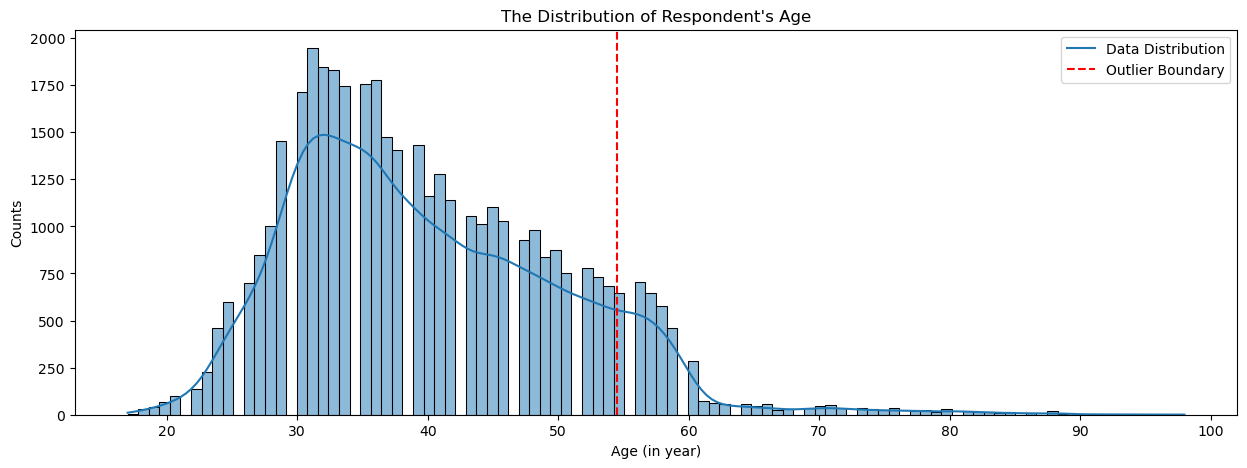

,mean,min,q1,q2,q3,max,iqr,std,skew,lower_boundary,upper_boundary,outliers,outliers%
column,,,,,,,,,,,,,
age,40.0238,17,32.0,38.0,47.0,98,15.0,10.42068,0.78456,24.5,54.5,5295,12.859433


In [12]:
hist_plotting(dataset=drop_df,
              x_column='age',
              plt_title="The Distribution of Respondent's Age",
              plt_xlabel='Age (in year)')

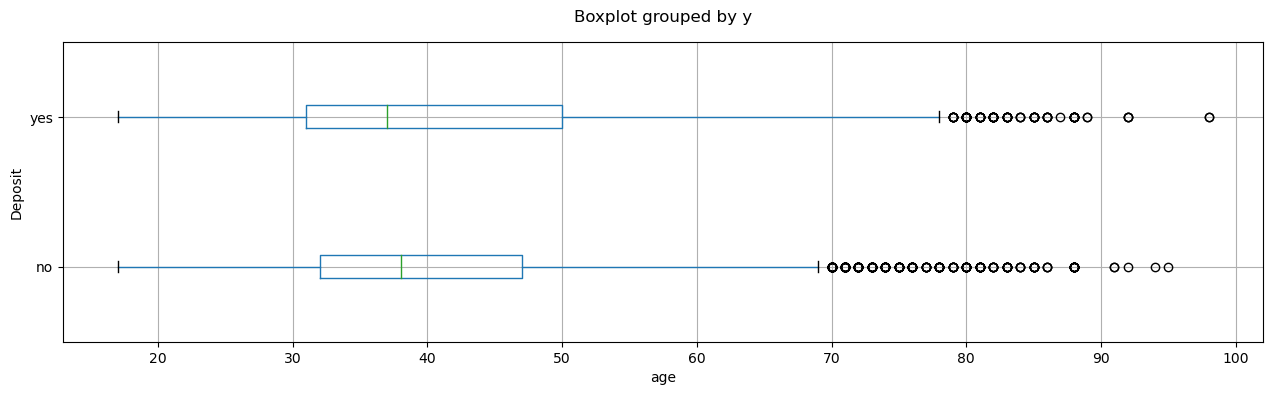

In [13]:
drop_df.boxplot(column=['age'], by='y', figsize=(15,4), vert=False, ylabel='Deposit', xlabel='age')
plt.title('')
plt.show()

Description:  
- The `age` column tends to be positively skewed, as evidenced by the chart leaning towards the left side of the graph. Twelve percent of all records were detected as outliers.
- Respondents who decide to subscribe to banking deposit services tend to be older compared to those who decline the offer.

## D2. Column Duration

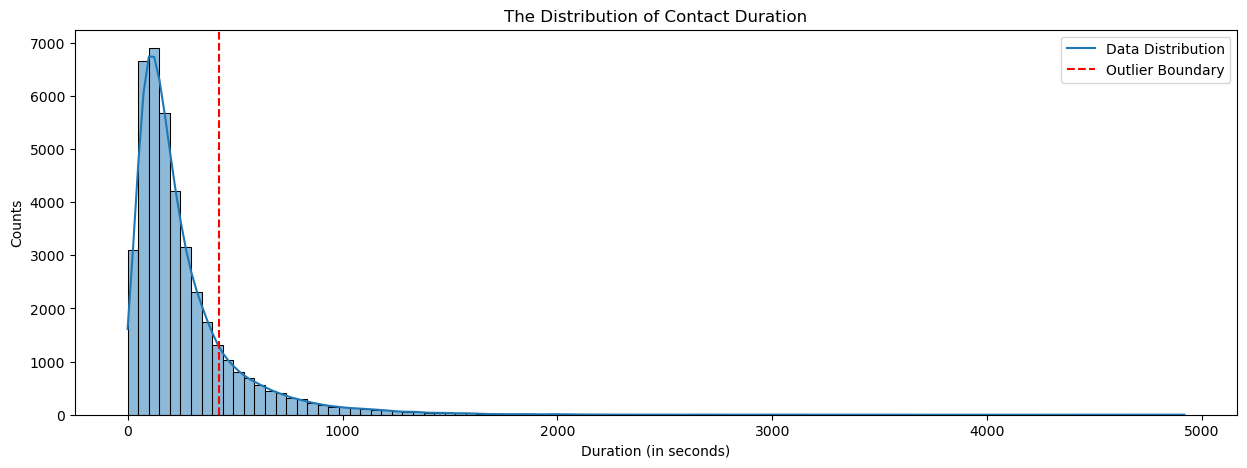

,mean,min,q1,q2,q3,max,iqr,std,skew,lower_boundary,upper_boundary,outliers,outliers%
column,,,,,,,,,,,,,
duration,258.315815,0,102.0,180.0,319.0,4918,217.0,259.305321,3.262808,-6.5,427.5,6445,15.652322


In [14]:
hist_plotting(dataset=drop_df,
              x_column='duration',
              plt_title="The Distribution of Contact Duration",
              plt_xlabel='Duration (in seconds)')

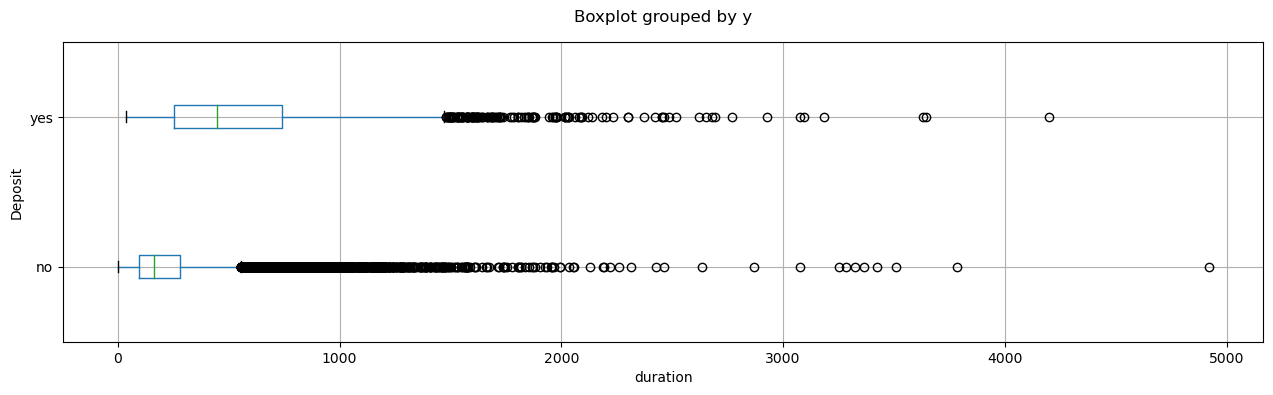

In [15]:
drop_df.boxplot(column=['duration'], by='y', figsize=(15,4), vert=False, ylabel='Deposit', xlabel='duration')
plt.title('')
plt.show()

Description:  
- The `duration` variable tends to be positively skewed; more than 15 percent of all records were considered outliers.
- Respondents who experienced a short duration tend to decline banking offers, while those engaged in long contact durations tend to become the next banking subscribers.
- It's also worth noting that this tendency can indicate that those who already have disinterest in banking offers tend not to further engage in marketer conversations.

## D3. Column Campaign

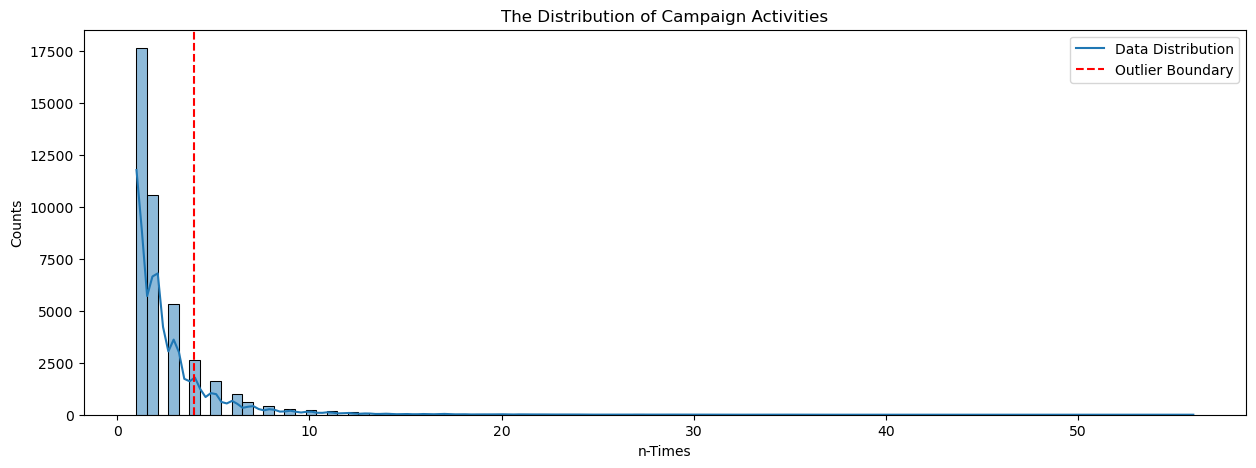

,mean,min,q1,q2,q3,max,iqr,std,skew,lower_boundary,upper_boundary,outliers,outliers%
column,,,,,,,,,,,,,
campaign,2.567879,1,1.0,2.0,3.0,56,2.0,2.770318,4.762044,0.0,4.0,4984,12.104138


In [16]:
hist_plotting(dataset=drop_df,
              x_column='campaign',
              plt_title="The Distribution of Campaign Activities",
              plt_xlabel='n-Times')

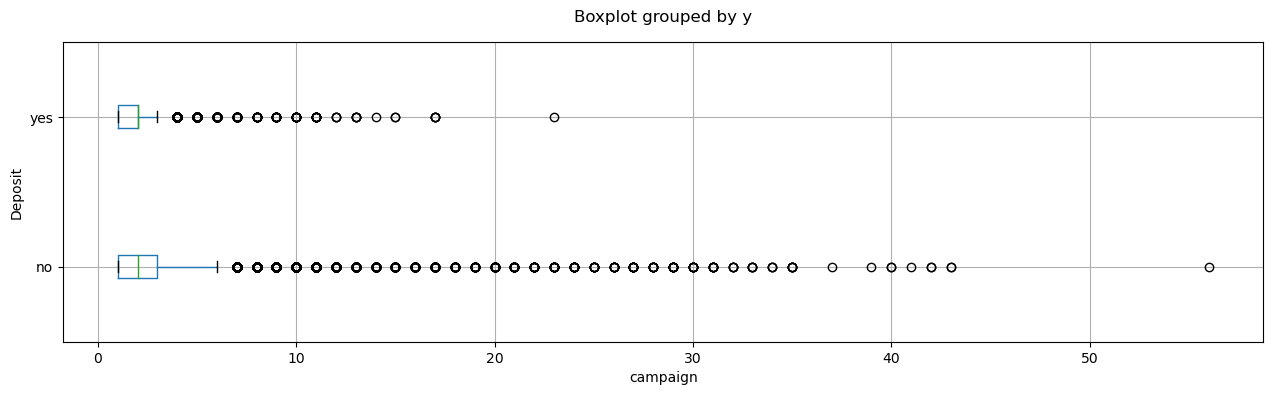

In [17]:
drop_df.boxplot(column=['campaign'], by='y', figsize=(15,4), vert=False, ylabel='Deposit', xlabel='campaign')
plt.title('')
plt.show()

Description:  
- Most respondents experienced fewer than 10 banking campaigns and interactions with telemarketers.
- Respondents who decided to subscribe to banking offers tended to experience fewer campaign occurrences. This could be due to their inherent interest, which may make them more responsive and quicker to decide to apply for the subscription.
- Conversely, most respondents who decided they were not interested in banking offers tended to experience prolonged campaign interactions, possibly due to delayed decision-making, extended follow-ups, and the inconvenience of being over-contacted by telemarketers.

## D4. Column Pdays

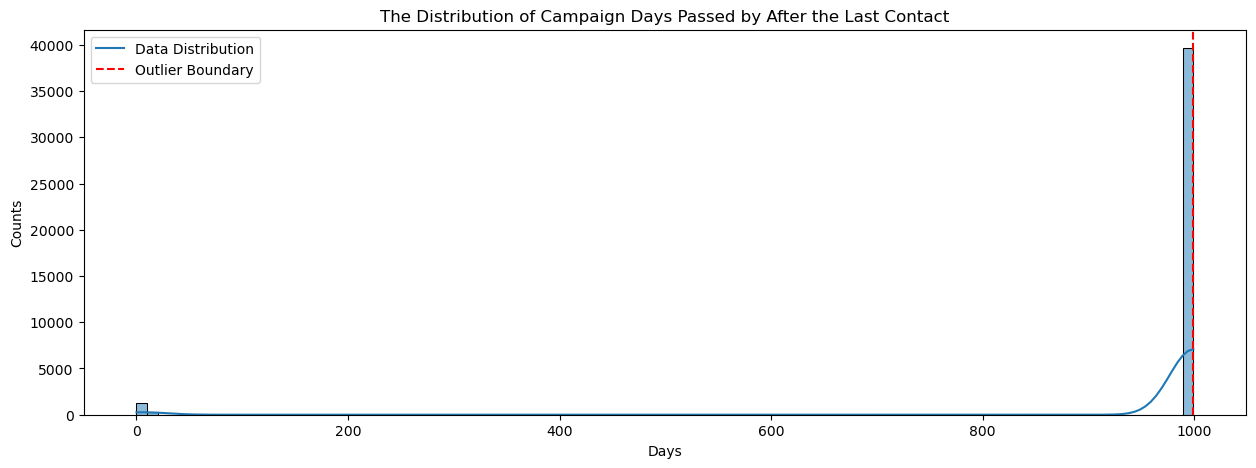

,mean,min,q1,q2,q3,max,iqr,std,skew,lower_boundary,upper_boundary,outliers,outliers%
column,,,,,,,,,,,,,
pdays,962.46481,0,999.0,999.0,999.0,999,0.0,186.937102,-4.921386,999.0,999.0,1515,3.679328


In [18]:
hist_plotting(dataset=drop_df,
              x_column='pdays',
              plt_title="The Distribution of Campaign Days Passed by After the Last Contact",
              plt_xlabel='Days')

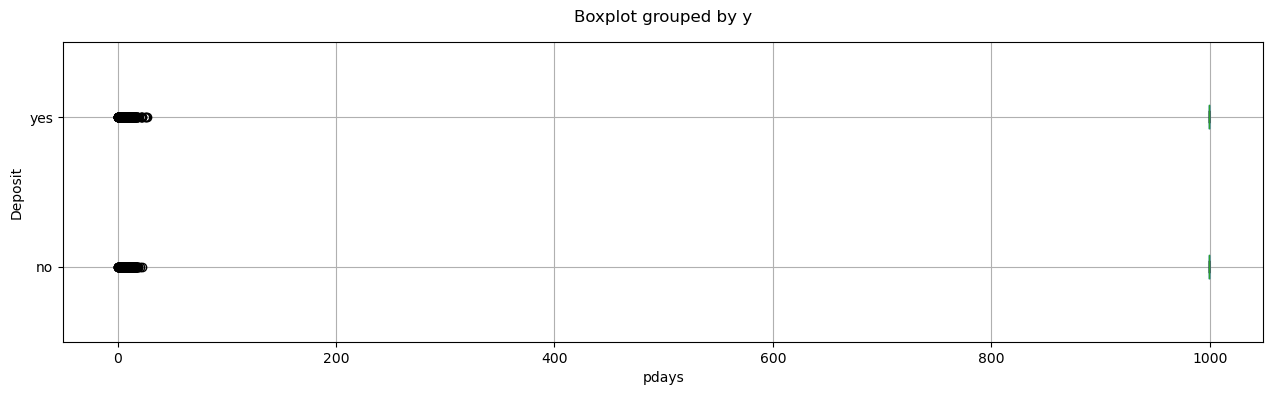

In [19]:
drop_df.boxplot(column=['pdays'], by='y', figsize=(15,4), vert=False, ylabel='Deposit', xlabel='pdays')
plt.title('')
plt.show()

Description: Overall, most respondents experienced being contacted for the first time during this campaign session.

### D4-1. Column Pdays without 999

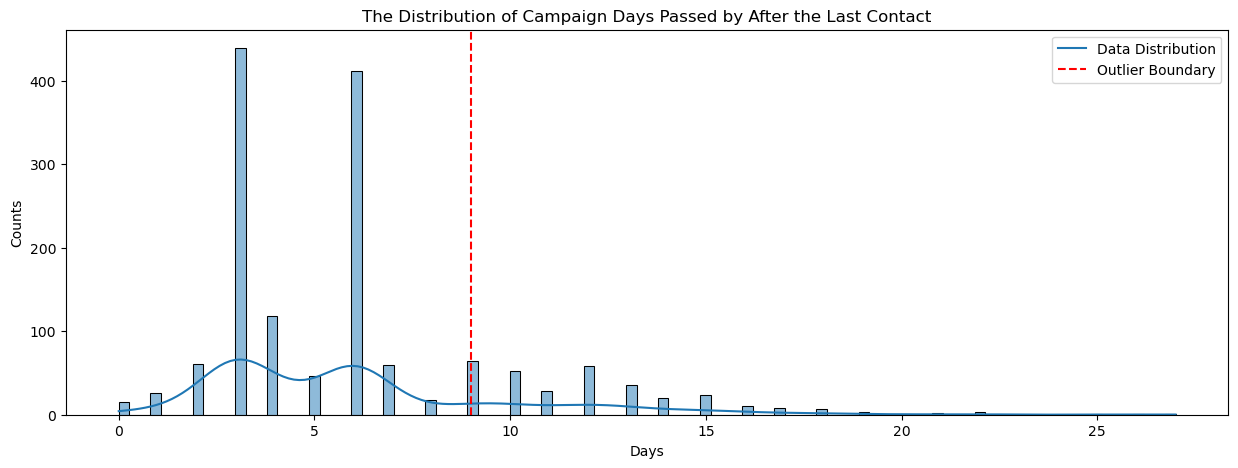

,mean,min,q1,q2,q3,max,iqr,std,skew,lower_boundary,upper_boundary,outliers,outliers%
column,,,,,,,,,,,,,
pdays,6.014521,0,3.0,6.0,7.0,27,4.0,3.824906,1.458564,1.0,9.0,271,17.887789


In [20]:
hist_plotting(dataset=drop_df[drop_df['pdays'] < 999],
              x_column='pdays',
              plt_title="The Distribution of Campaign Days Passed by After the Last Contact",
              plt_xlabel='Days')

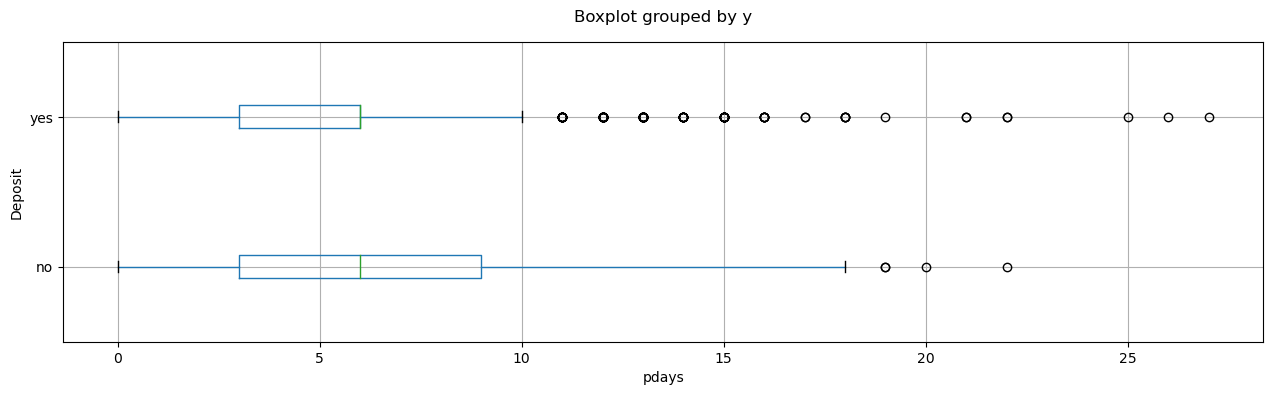

In [21]:
drop_df[drop_df['pdays'] < 999].boxplot(column=['pdays'], by='y', figsize=(15,4), vert=False, ylabel='Deposit', xlabel='pdays')
plt.title('')
plt.show()

Description:
- Excluding the 999 category, we observe that individuals who opt to subscribe to the banking service tend to experience a shorter period since the last confirmation call. This suggests that those who accept the offer often have pre-existing interest in joining and subscribing to the banking deposit service.
- Conversely, those who decline the offer tend to have a longer period since the last confirmation call, possibly indicating lost interest or indecision, leading to cancellation or disinterest in the subscription service.

## D5. Column Previous

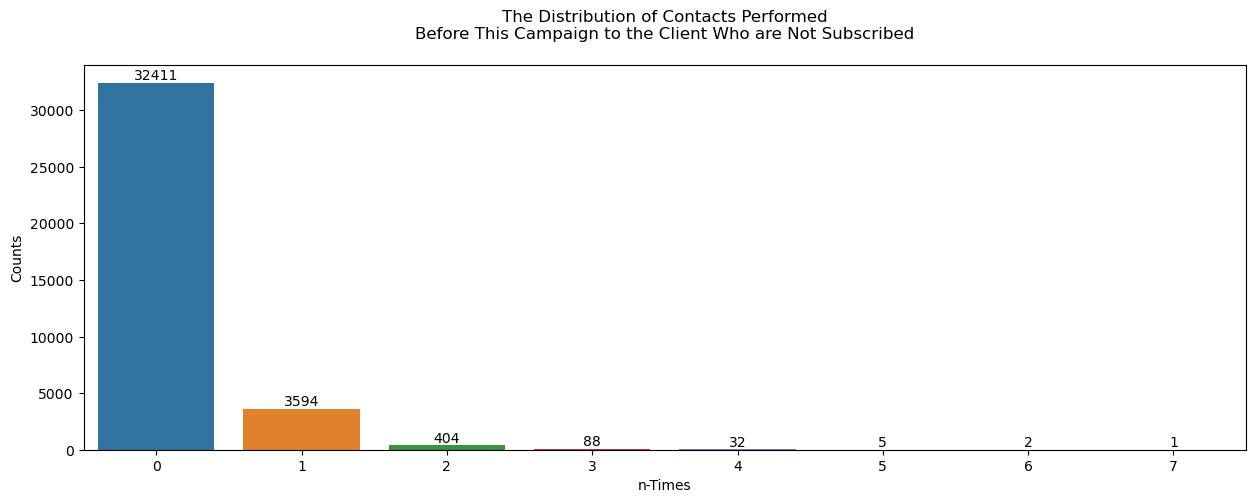

In [22]:
plt.figure(figsize=(15,5))
ax = sns.countplot(data=drop_df[drop_df['y'] == 'no'], x='previous')
ax.bar_label(ax.containers[0])
plt.title('The Distribution of Contacts Performed\nBefore This Campaign to the Client Who are Not Subscribed\n')
plt.xlabel('n-Times')
plt.ylabel('Counts')
plt.show()

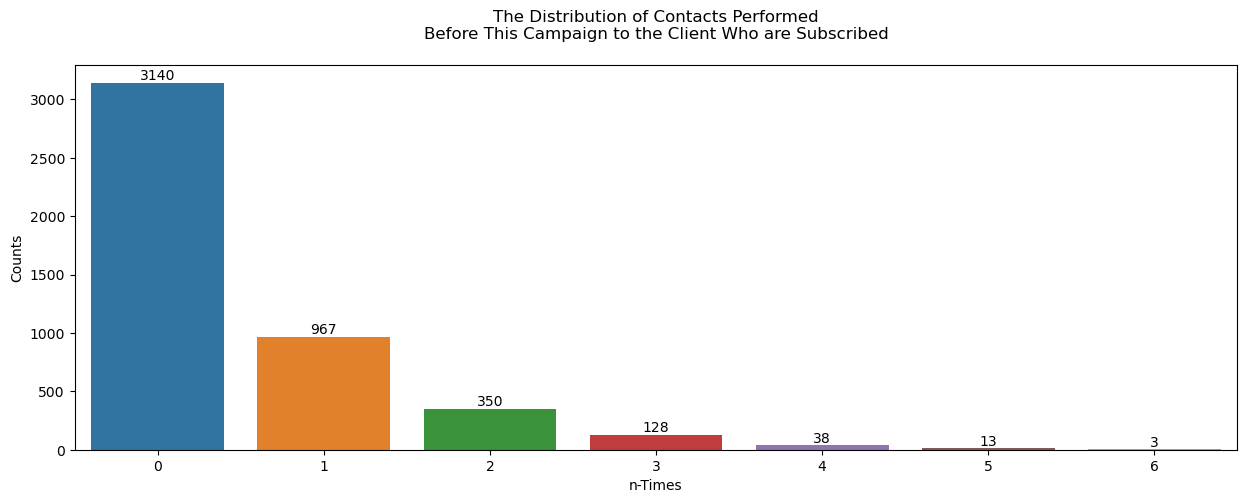

In [23]:
plt.figure(figsize=(15,5))
ax = sns.countplot(data=drop_df[drop_df['y'] == 'yes'], x='previous')
ax.bar_label(ax.containers[0])
plt.title('The Distribution of Contacts Performed\nBefore This Campaign to the Client Who are Subscribed\n')
plt.xlabel('n-Times')
plt.ylabel('Counts')
plt.show()

Description:
- There is a slight difference in the number of contacts made with respondents who ultimately subscribed and those who declined the subscription offerings.
- Respondents who showed disinterest in the banking subscription were contacted for the first time during this specific banking campaign.
- Conversely, those who eventually subscribed tended to receive multiple calls, at least one call, prior to the campaign. This may indicate that they needed time to deliberate on their decision regarding the offering.

## D6. Employment Variation Rate

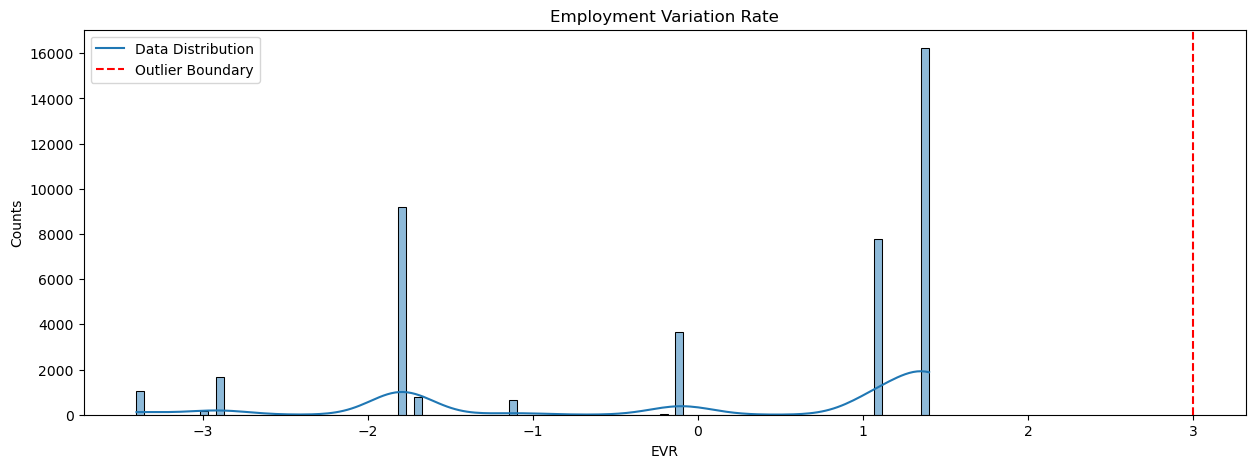

,mean,min,q1,q2,q3,max,iqr,std,skew,lower_boundary,upper_boundary,outliers,outliers%
column,,,,,,,,,,,,,
emp.var.rate,0.081922,-3.4,-1.8,1.1,1.4,1.4,3.2,1.570883,-0.724061,-3.4,3.0,0,0.0


In [24]:
hist_plotting(dataset=drop_df,
              x_column='emp.var.rate',
              plt_title="Employment Variation Rate",
              plt_xlabel='EVR')

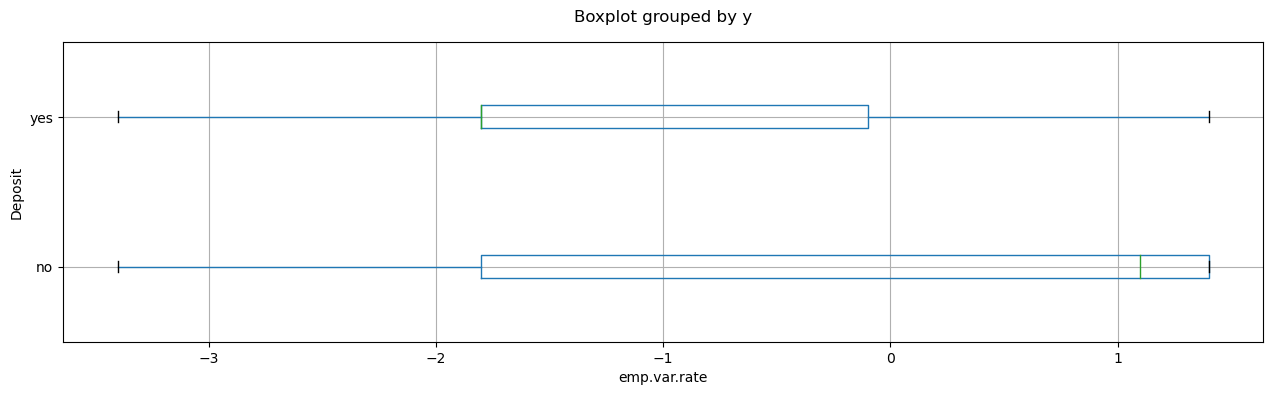

In [25]:
drop_df.boxplot(column=['emp.var.rate'], by='y', figsize=(15,4), vert=False, ylabel='Deposit', xlabel='emp.var.rate')
plt.title('')
plt.show()

Description: Customers are more likely to decline the subscription offering when the employment rate is higher, as evidenced by the distribution of Employment Variation Rate (EVR) among the records of those who remain unsubscribed.

## D7. Consumer Price Index

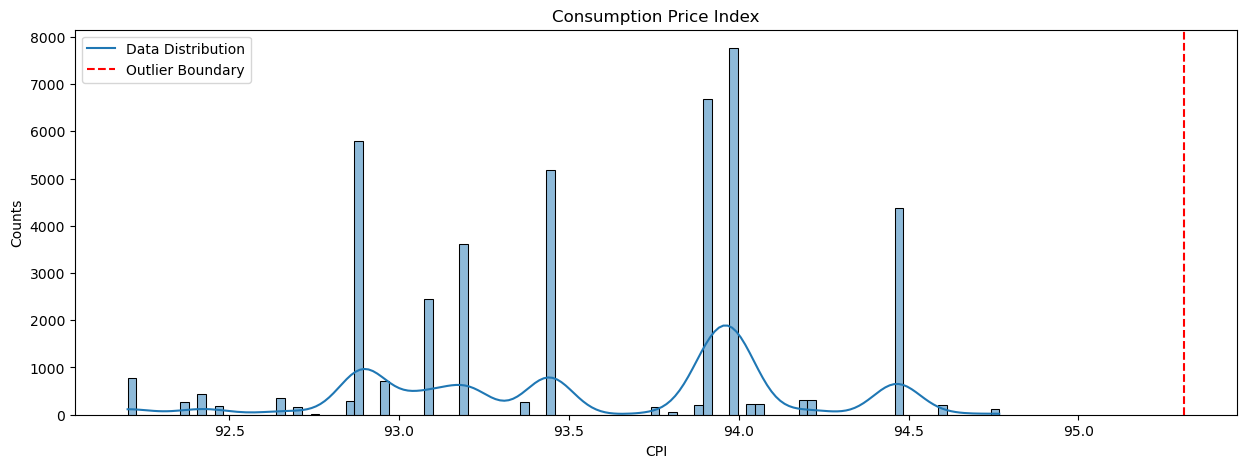

,mean,min,q1,q2,q3,max,iqr,std,skew,lower_boundary,upper_boundary,outliers,outliers%
column,,,,,,,,,,,,,
cons.price.idx,93.57572,92.201,93.075,93.749,93.994,94.767,0.919,0.578839,-0.230853,91.839203,95.312237,0,0.0


In [26]:
hist_plotting(dataset=drop_df,
              x_column='cons.price.idx',
              plt_title="Consumption Price Index",
              plt_xlabel='CPI')

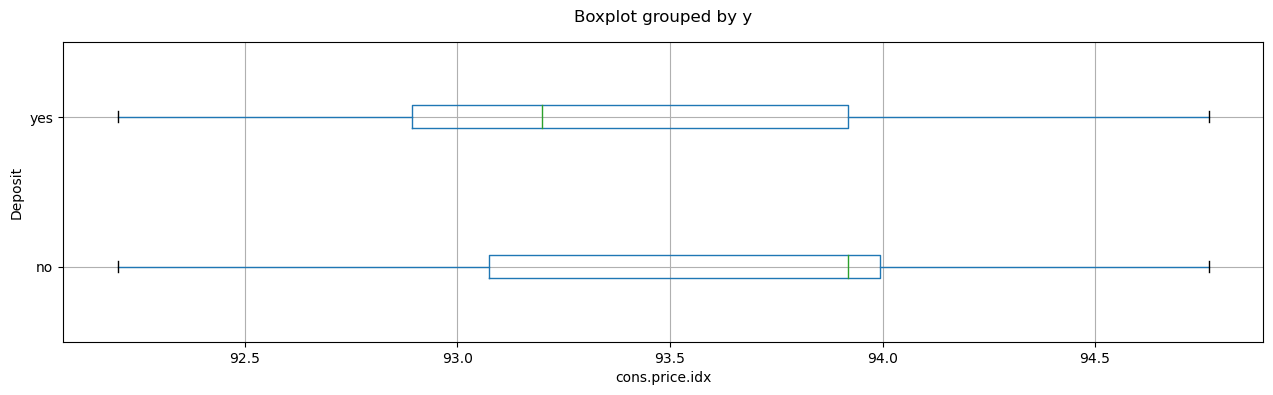

In [27]:
drop_df.boxplot(column=['cons.price.idx'], by='y', figsize=(15,4), vert=False, ylabel='Deposit', xlabel='cons.price.idx')
plt.title('')
plt.show()

Description:
- The majority of prospective customers choose to confidently make deposits into the following bank services when the economic situation shows that the consumer consumption index is at a lower average. This may be because customers are likely to be more confident when consumer prices are lower, leaving income available for deposits.
- On the other hand, when the consumer consumption index is relatively higher, prospective customers hesitate to make banking deposits.

## D8. Consumer Confidence Index

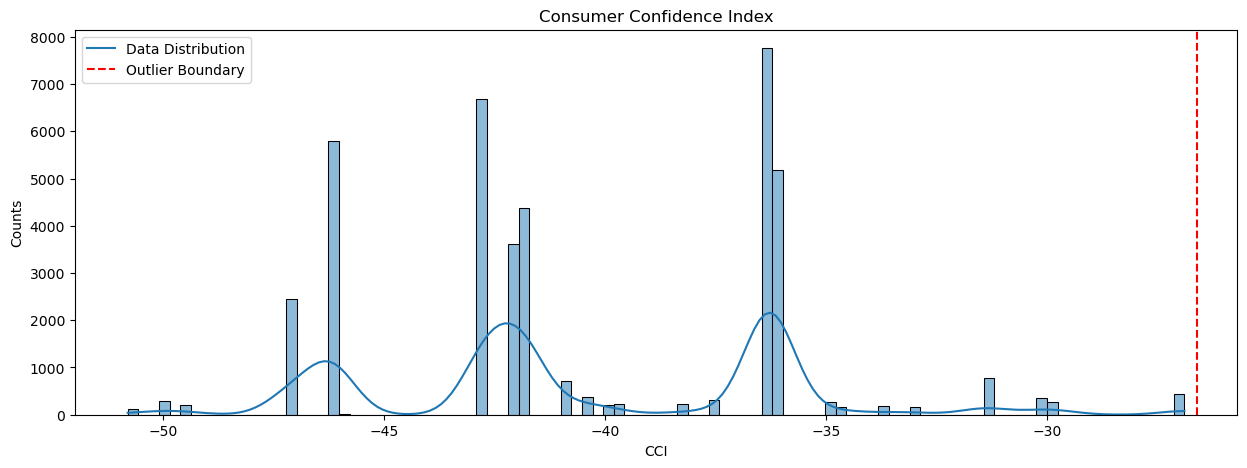

,mean,min,q1,q2,q3,max,iqr,std,skew,lower_boundary,upper_boundary,outliers,outliers%
column,,,,,,,,,,,,,
cons.conf.idx,-40.502863,-50.8,-42.7,-41.8,-36.4,-26.9,6.3,4.62786,0.302876,-54.386443,-26.619283,0,0.0


In [28]:
hist_plotting(dataset=drop_df,
              x_column='cons.conf.idx',
              plt_title="Consumer Confidence Index",
              plt_xlabel='CCI')

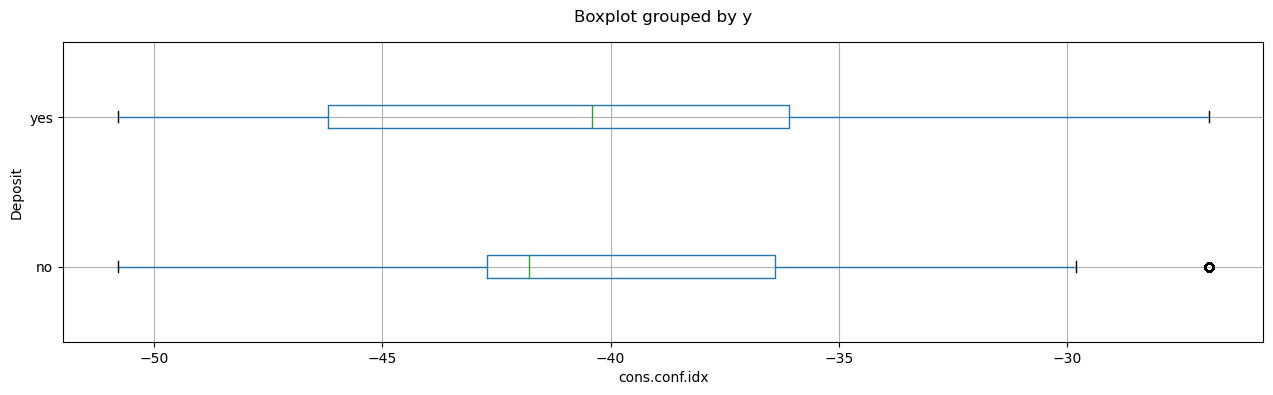

In [29]:
drop_df.boxplot(column=['cons.conf.idx'], by='y', figsize=(15,4), vert=False, ylabel='Deposit', xlabel='cons.conf.idx')
plt.title('')
plt.show()

Description: The majority of prospective customers who decide to deposit into banking services tend to do so at higher levels of consumer confidence compared to the average among those who decide to decline the offer. This indicates that customers are more likely to trust depositing their assets into financial assets when the economic conditions are better.

## D9. Column Euribor3M

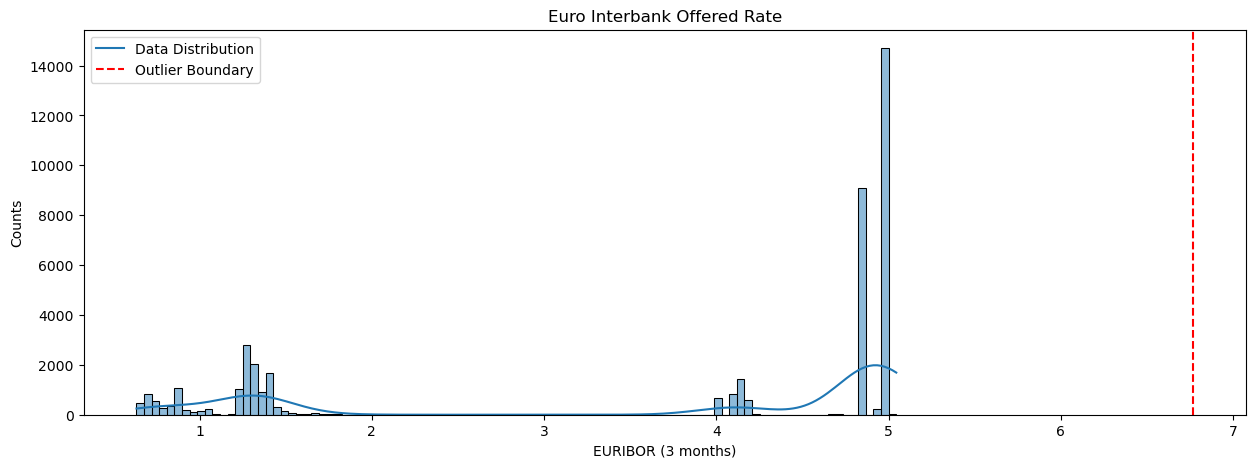

,mean,min,q1,q2,q3,max,iqr,std,skew,lower_boundary,upper_boundary,outliers,outliers%
column,,,,,,,,,,,,,
euribor3m,3.621293,0.634,1.344,4.857,4.961,5.045,3.617,1.734437,-0.709194,-0.4645,6.7695,0,0.0


In [30]:
hist_plotting(dataset=drop_df,
              x_column='euribor3m',
              plt_title="Euro Interbank Offered Rate",
              plt_xlabel='EURIBOR (3 months)')

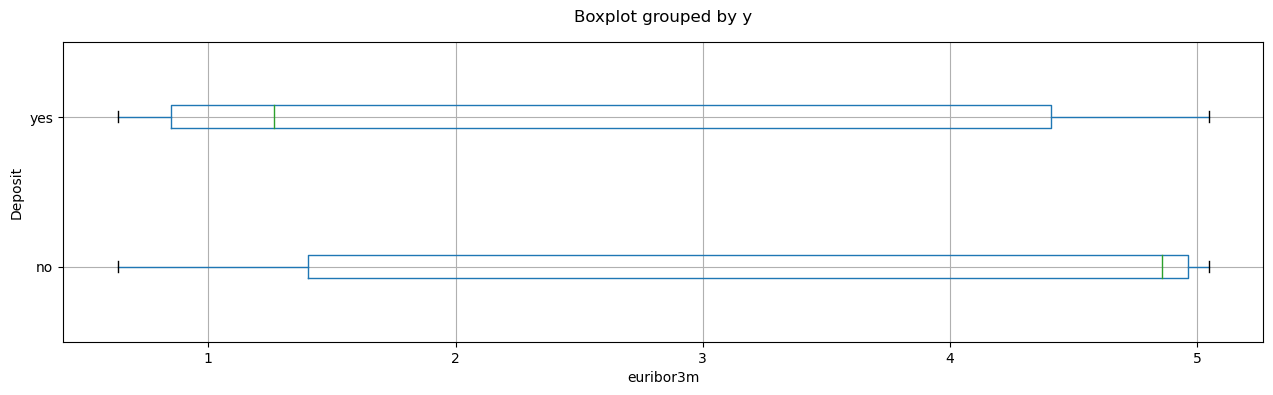

In [31]:
drop_df.boxplot(column=['euribor3m'], by='y', figsize=(15,4), vert=False, ylabel='Deposit', xlabel='euribor3m')
plt.title('')
plt.show()

Description: Based on the situation related to the following column, it is known that prospective customers tend to decide to deposit financial assets into the bank when the bank interest rates do not experience significant increases. This indicates a tendency towards conservatism among customers when faced with higher interest rates.

## D10. Column Job

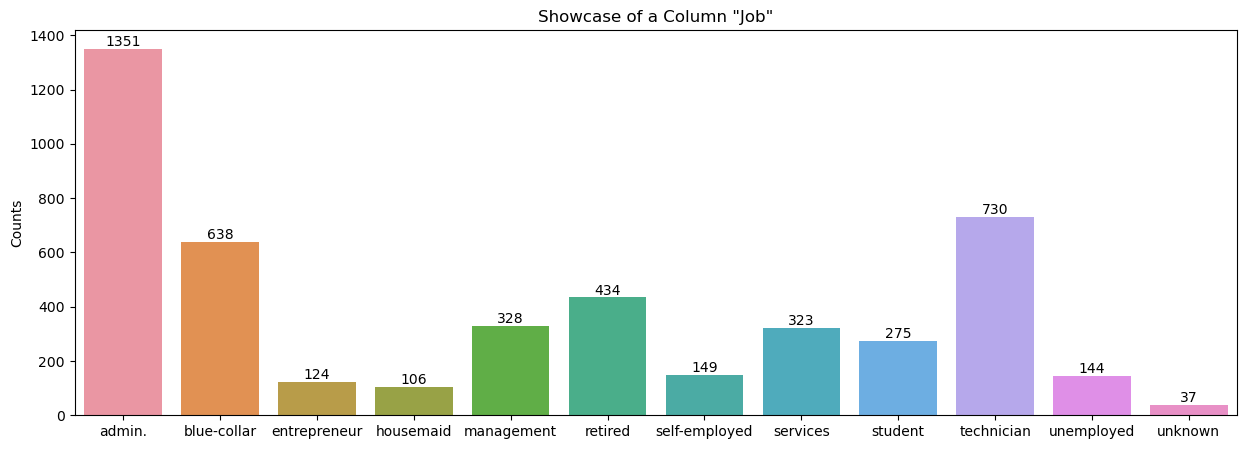

categories,admin.,blue-collar,entrepreneur,housemaid,management,retired,self-employed,services,student,technician,unemployed,unknown
perc_count,29.12%,13.75%,2.67%,2.28%,7.07%,9.36%,3.21%,6.96%,5.93%,15.74%,3.1%,0.8%


In [32]:
box_plotting(dataset=drop_df[drop_df['y'] == 'yes'],
             column='job')

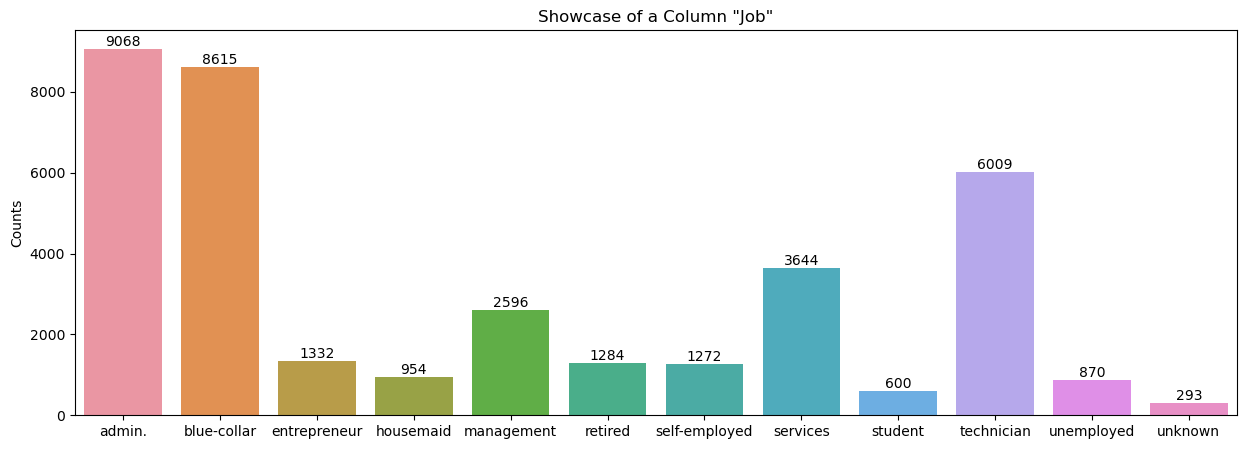

categories,admin.,blue-collar,entrepreneur,housemaid,management,retired,self-employed,services,student,technician,unemployed,unknown
perc_count,24.82%,23.58%,3.65%,2.61%,7.11%,3.51%,3.48%,9.97%,1.64%,16.45%,2.38%,0.8%


In [33]:
box_plotting(dataset=drop_df[drop_df['y'] == 'no'],
             column='job')

Description: The most commonly mentioned occupations by respondents are related to administration and private employees. This is consistently found among respondents who ultimately choose to deposit or not to deposit. Both groups also similarly have the third most frequent occupation, which is technicians.

## D11. Column Merital Status

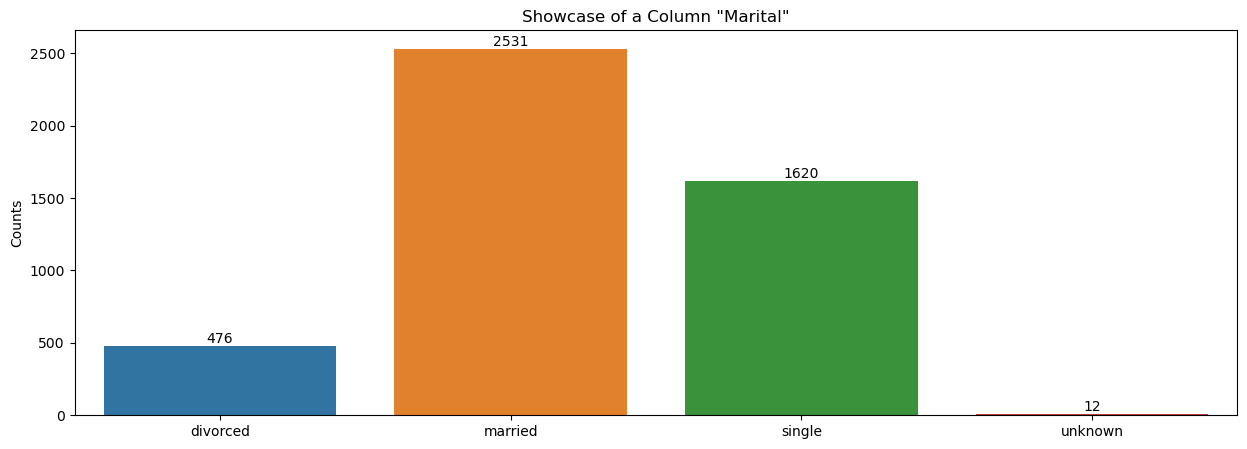

categories,divorced,married,single,unknown
perc_count,10.26%,54.56%,34.92%,0.26%


In [34]:
box_plotting(dataset=drop_df[drop_df['y'] == 'yes'],
             column='marital')

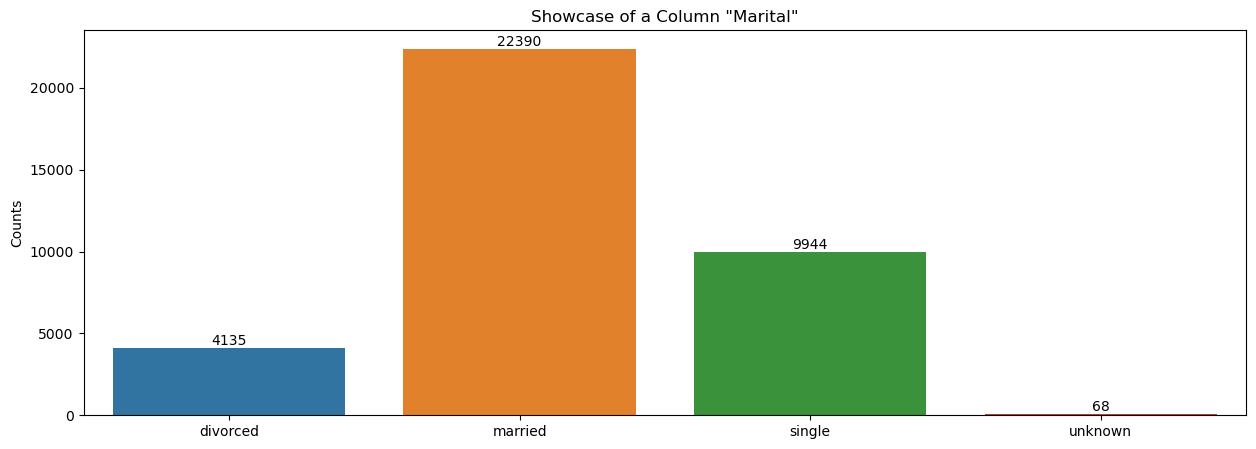

categories,divorced,married,single,unknown
perc_count,11.32%,61.28%,27.22%,0.19%


In [35]:
box_plotting(dataset=drop_df[drop_df['y'] == 'no'],
             column='marital')

Description: Based on the identification of marital status characteristics between those who choose to deposit and those who do not, it is found that there is no significant difference, considering that the majority of both groups are respondents who are already married.

## D12. Column Education

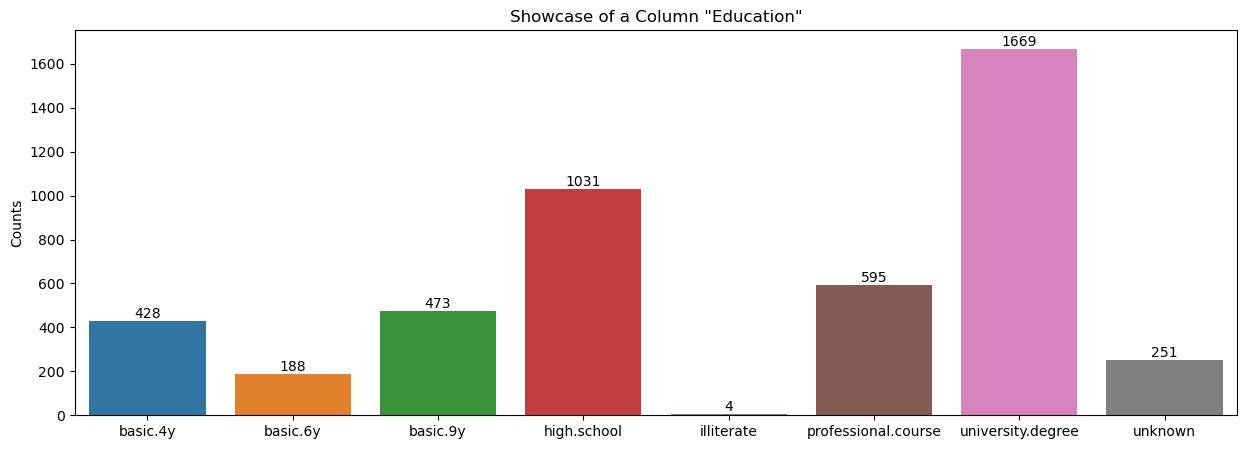

categories,basic.4y,basic.6y,basic.9y,high.school,illiterate,professional.course,university.degree,unknown
perc_count,9.23%,4.05%,10.2%,22.22%,0.09%,12.83%,35.98%,5.41%


In [36]:
box_plotting(dataset=drop_df[drop_df['y'] == 'yes'],
             column='education')

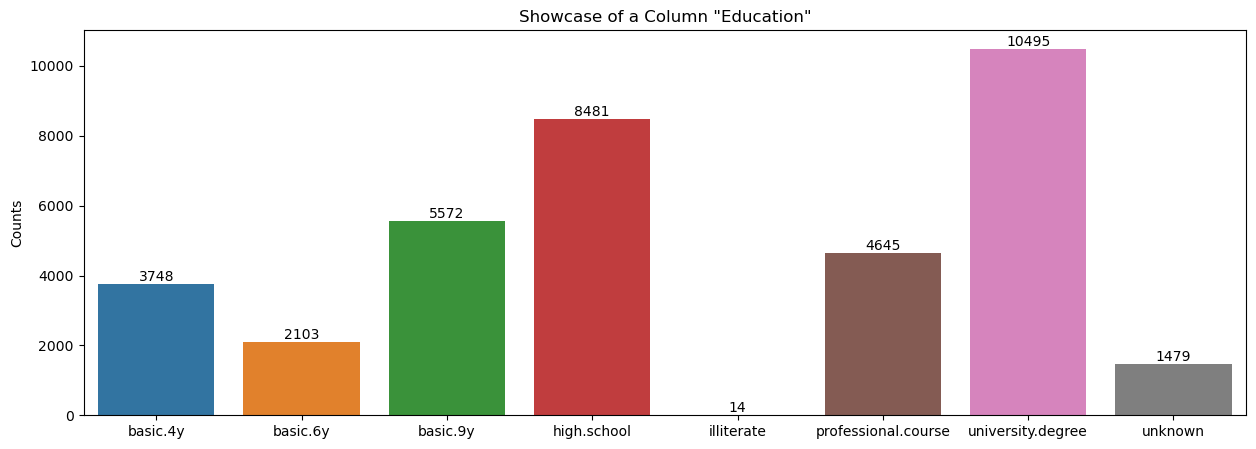

categories,basic.4y,basic.6y,basic.9y,high.school,illiterate,professional.course,university.degree,unknown
perc_count,10.26%,5.76%,15.25%,23.21%,0.04%,12.71%,28.72%,4.05%


In [37]:
box_plotting(dataset=drop_df[drop_df['y'] == 'no'],
             column='education')

Description:
- Respondents who eventually deposit assets into the bank after the campaign tend to be focused on the university education demographic category.
- On the other hand, respondents who choose not to deposit tend to come from a more diverse demographic category. This group has a larger proportion of basic and secondary education backgrounds.
- This indicates that the level of education contributes significantly to their decision to deposit or pass up this opportunity.

## D13. Column Default

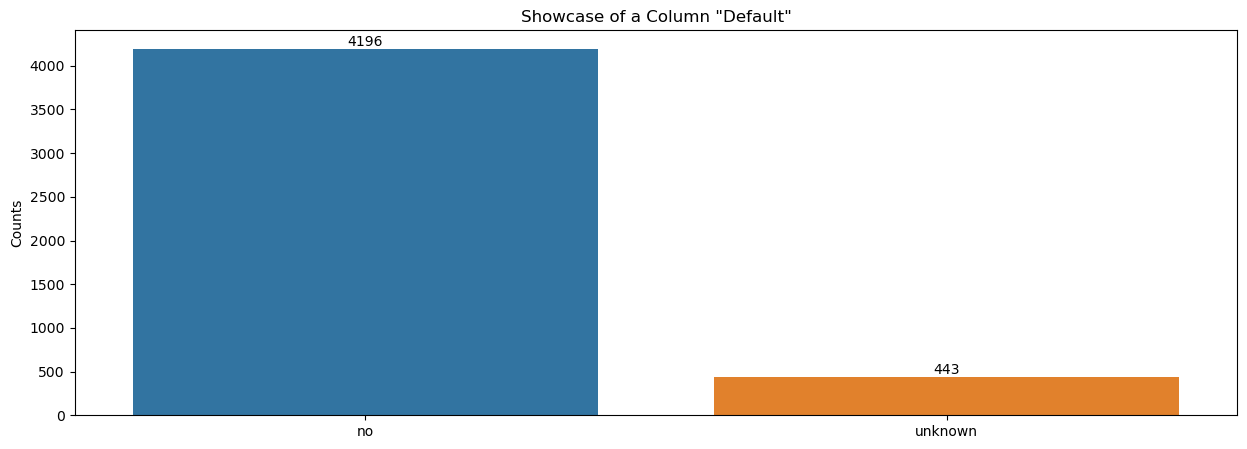

categories,no,unknown
perc_count,90.45%,9.55%


In [38]:
box_plotting(dataset=drop_df[drop_df['y'] == 'yes'],
             column='default')

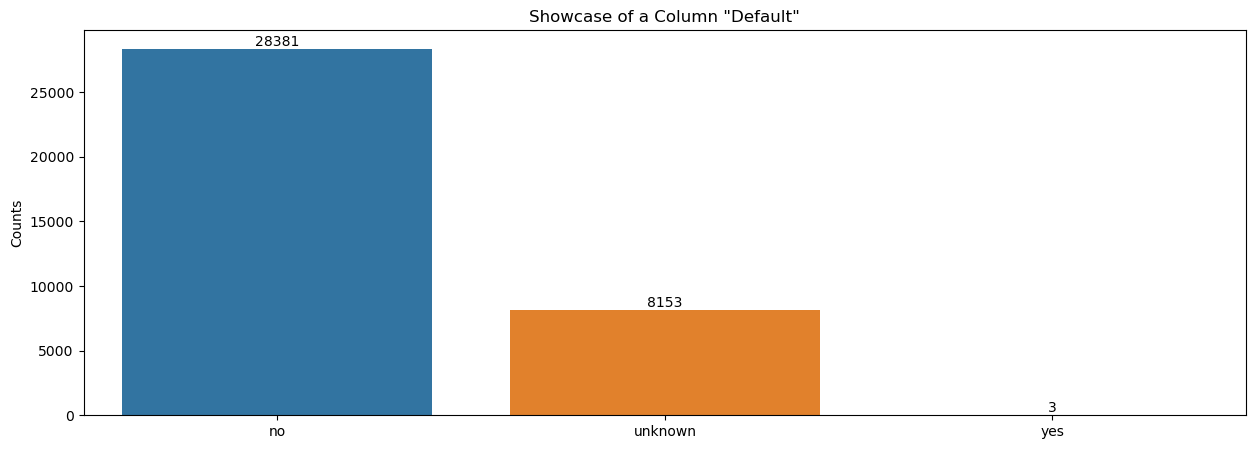

categories,no,unknown,yes
perc_count,77.68%,22.31%,0.01%


In [39]:
box_plotting(dataset=drop_df[drop_df['y'] == 'no'],
             column='default')

Description:
- Overall, respondents generally do not have loans in default.
- 90 percent of respondents who ultimately opt for term deposit services at the bank state that they have never experienced defaults in borrowing; the remainder chose not to answer this status.
- On the other hand, 77 percent of respondents who choose not to take deposit services state that they have never experienced defaults in borrowing.
- It is worth noting that the unknown category has a more pronounced percentage among those who choose not to take deposit services.

## D14. Column Housing

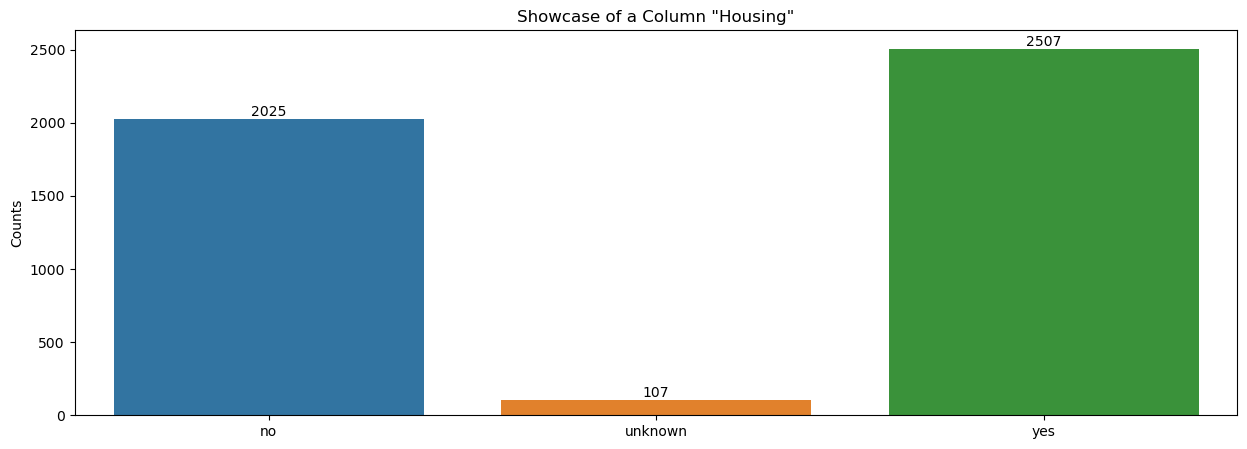

categories,no,unknown,yes
perc_count,43.65%,2.31%,54.04%


In [40]:
box_plotting(dataset=drop_df[drop_df['y'] == 'yes'],
             column='housing')

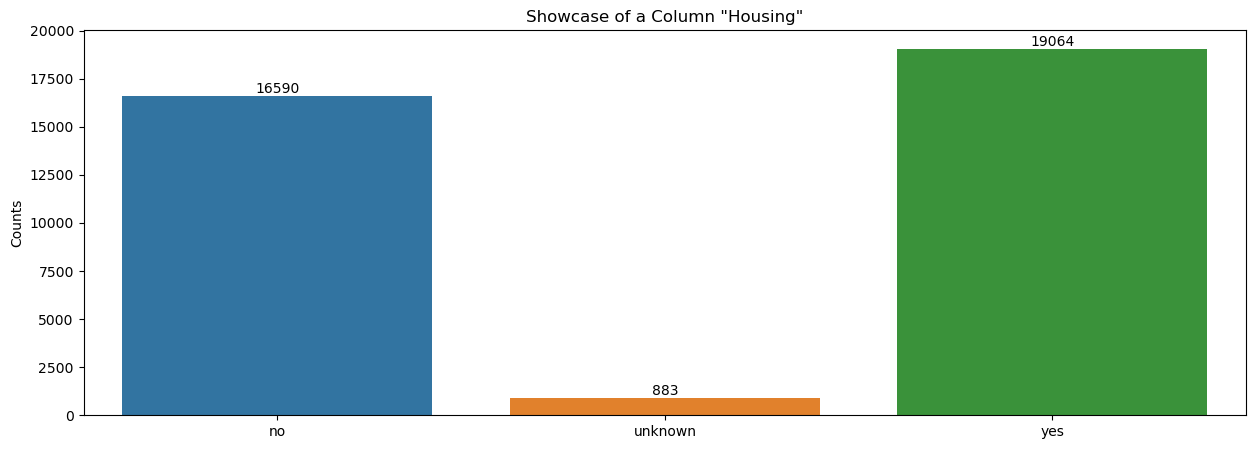

categories,no,unknown,yes
perc_count,45.41%,2.42%,52.18%


In [41]:
box_plotting(dataset=drop_df[drop_df['y'] == 'no'],
             column='housing')

Description: The majority of respondents have home construction loans. This is indicated by data showing that more than half of the respondents, specifically those who take term deposit services at the bank and those who reject the offer, claim to have a home mortgage program.

## D15. Column Loan

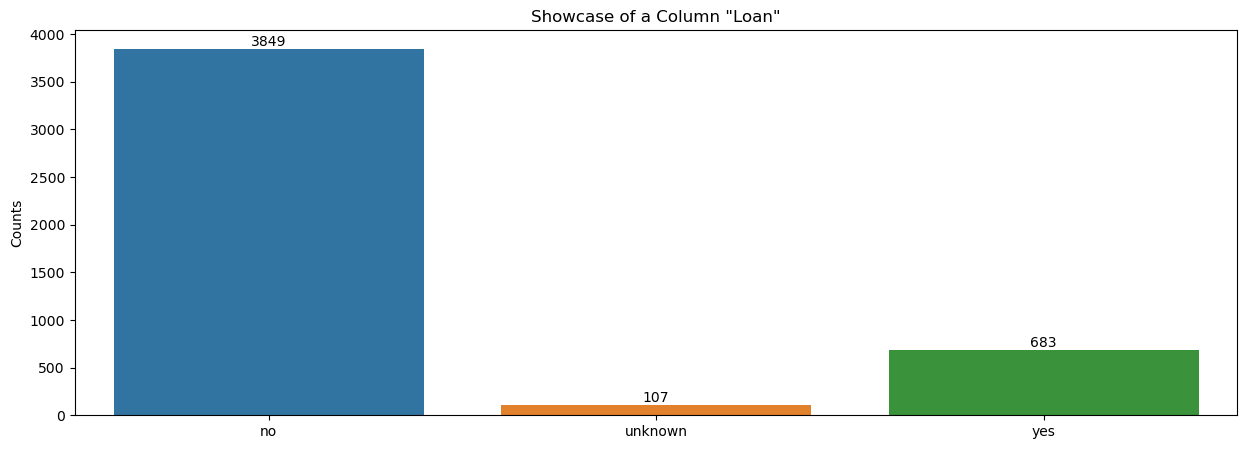

categories,no,unknown,yes
perc_count,82.97%,2.31%,14.72%


In [42]:
box_plotting(dataset=drop_df[drop_df['y'] == 'yes'],
             column='loan')

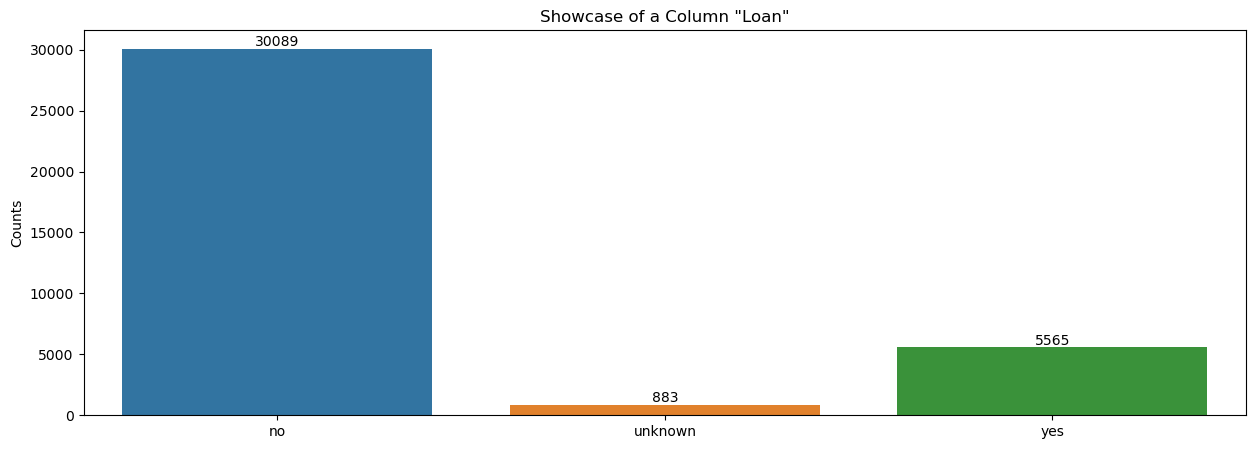

categories,no,unknown,yes
perc_count,82.35%,2.42%,15.23%


In [43]:
box_plotting(dataset=drop_df[drop_df['y'] == 'no'],
             column='loan')

Description: Demographically overall, the majority of respondents do not have existing loans in their accounts. The following proportions can be said to be the same between respondents who subscribe to the default term subscription and those who reject the following offer.

## D16. Column Contact

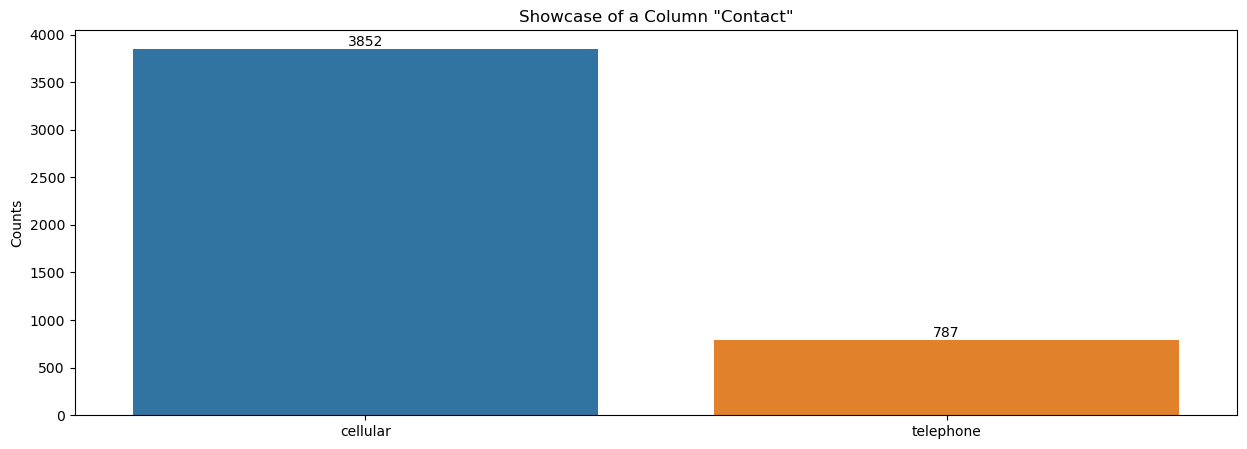

categories,cellular,telephone
perc_count,83.04%,16.96%


In [44]:
box_plotting(dataset=drop_df[drop_df['y'] == 'yes'],
             column='contact')

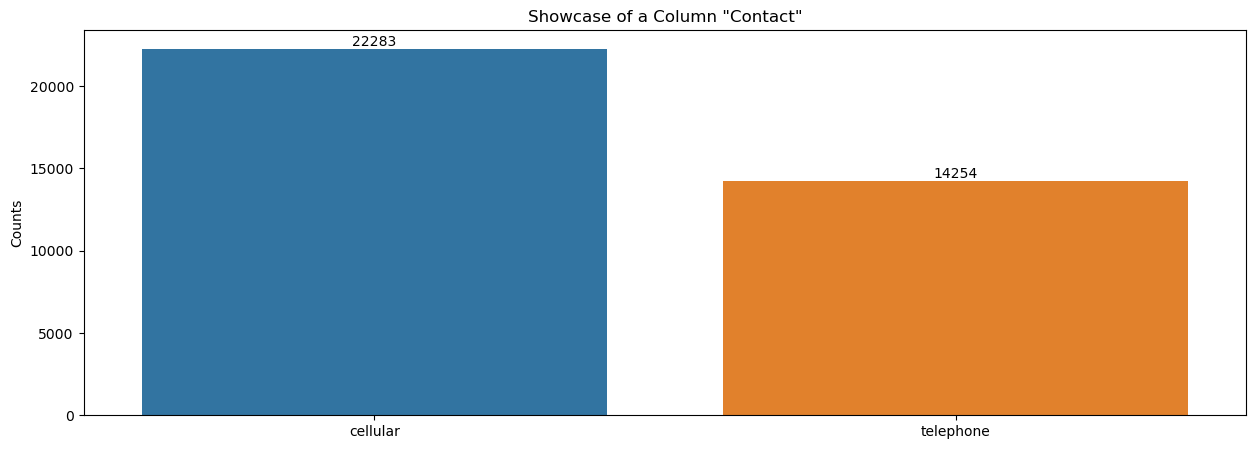

categories,cellular,telephone
perc_count,60.99%,39.01%


In [45]:
box_plotting(dataset=drop_df[drop_df['y'] == 'no'],
             column='contact')

Description:
- The majority of respondents who choose not to subscribe to the bank's deposit service are respondents contacted via mobile phone, as are those who ultimately subscribe to the term deposit service.
- There is an interesting pattern where respondents who reject the offer have a proportion of responses via landline phone. This indicates that respondents may tend not to continue contact related to marketing through the following medium.

## D17. Column Month

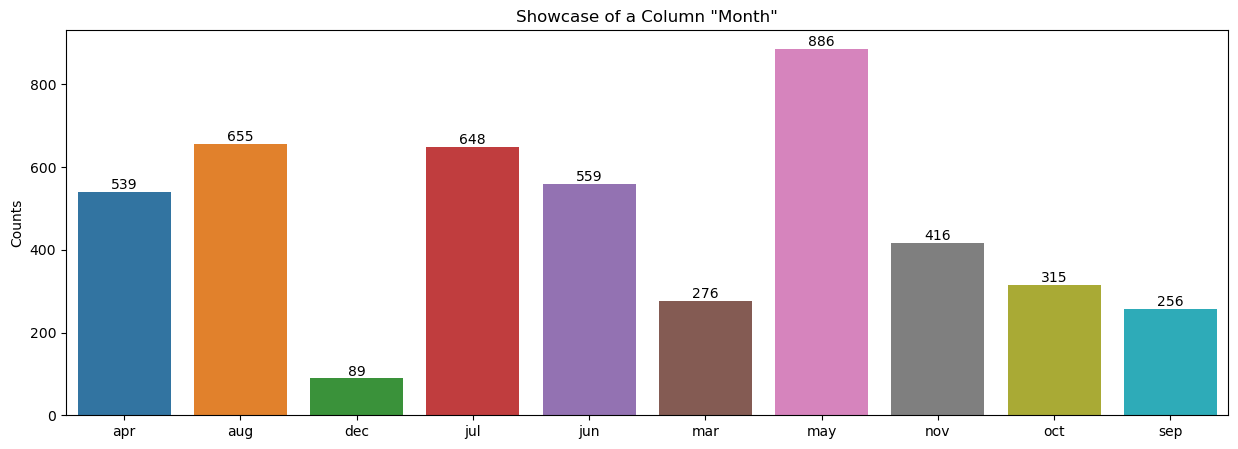

categories,apr,aug,dec,jul,jun,mar,may,nov,oct,sep
perc_count,11.62%,14.12%,1.92%,13.97%,12.05%,5.95%,19.1%,8.97%,6.79%,5.52%


In [46]:
box_plotting(dataset=drop_df[drop_df['y'] == 'yes'],
             column='month')

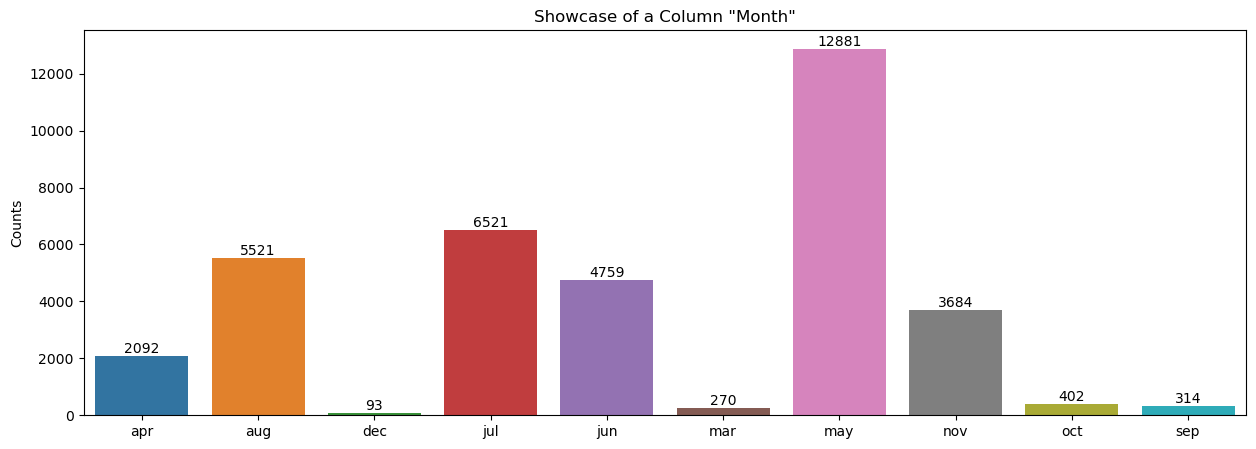

categories,apr,aug,dec,jul,jun,mar,may,nov,oct,sep
perc_count,5.73%,15.11%,0.25%,17.85%,13.03%,0.74%,35.25%,10.08%,1.1%,0.86%


In [47]:
box_plotting(dataset=drop_df[drop_df['y'] == 'no'],
             column='month')

Description:
- Both graphs above indicate that the majority of respondents have been contacted by the marketing team most frequently in the month of May.
- There is a very prominent trend among those who decide not to take the deposit service. In this group, almost 3 out of 4 people who were contacted and then chose to decline the service were contacted in May.

## D18. Column Day of Week

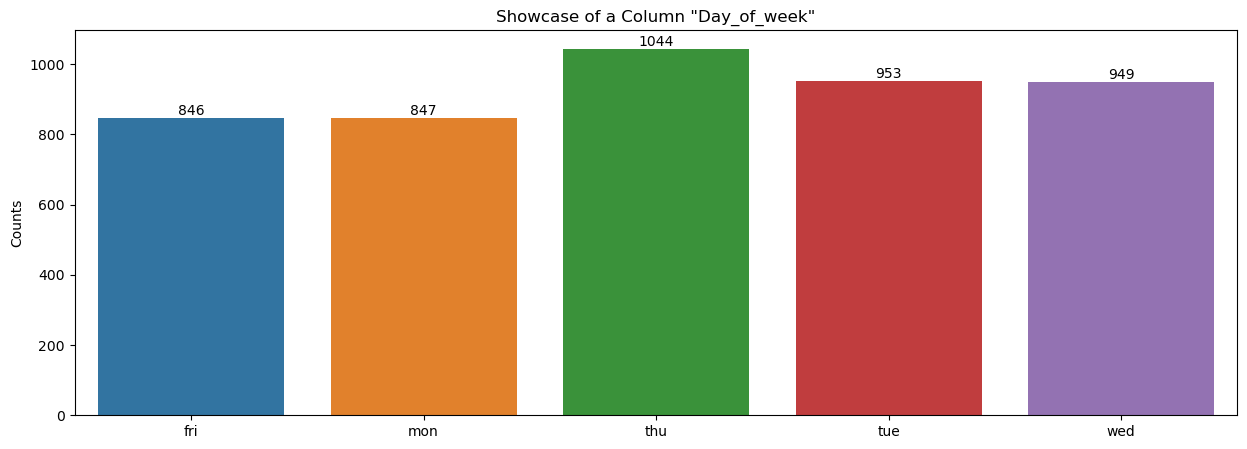

categories,fri,mon,thu,tue,wed
perc_count,18.24%,18.26%,22.5%,20.54%,20.46%


In [48]:
box_plotting(dataset=drop_df[drop_df['y'] == 'yes'],
             column='day_of_week')

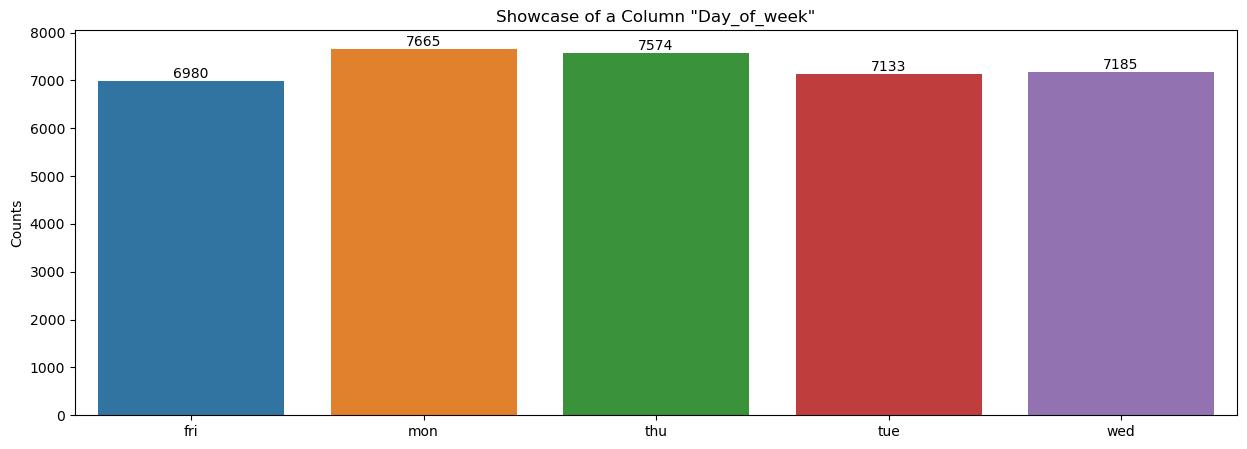

categories,fri,mon,thu,tue,wed
perc_count,19.1%,20.98%,20.73%,19.52%,19.66%


In [49]:
box_plotting(dataset=drop_df[drop_df['y'] == 'no'],
             column='day_of_week')

Description: All respondents, whether they eventually agreed to open the deposit service offered by the bank or declined the offer, were contacted evenly on weekdays. This tends to indicate no noticeable differences related to the determining trend of contact days with the campaign's success rate.

## D19. Column POutcome

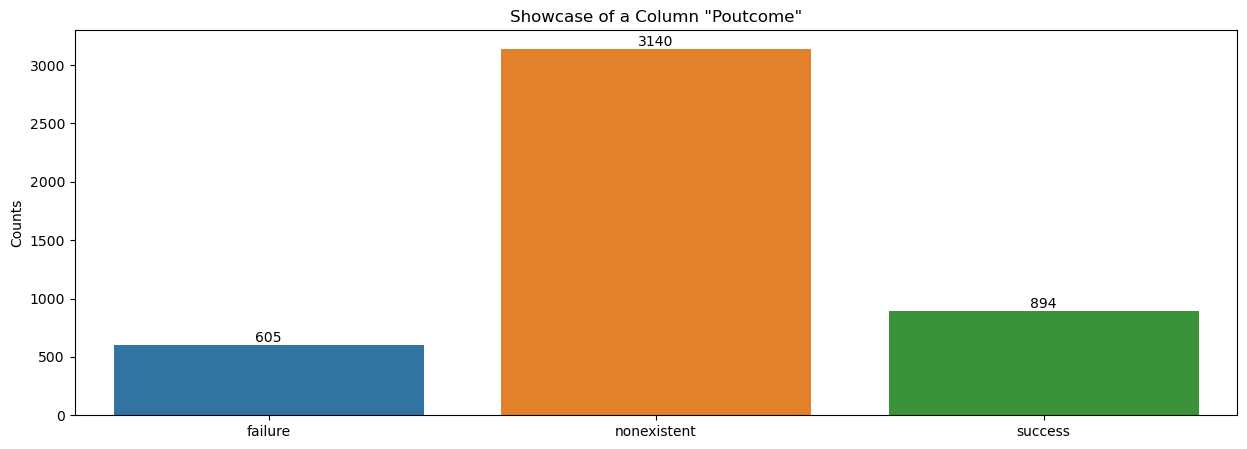

categories,failure,nonexistent,success
perc_count,13.04%,67.69%,19.27%


In [50]:
box_plotting(dataset=drop_df[drop_df['y'] == 'yes'],
             column='poutcome')

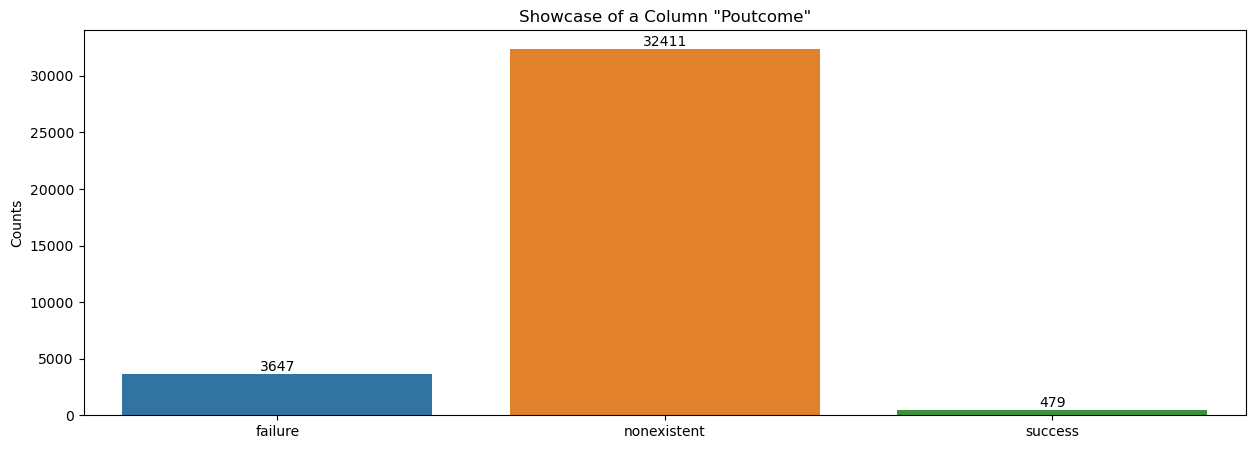

categories,failure,nonexistent,success
perc_count,9.98%,88.71%,1.31%


In [51]:
box_plotting(dataset=drop_df[drop_df['y'] == 'no'],
             column='poutcome')

Description: This column tends to indicate categories that show success in previous campaign results, dominated by respondents who in the current campaign decide to subscribe to the deposit service offered by the bank. This suggests that people's tendency to take a subscription from the deposit service depends on their success rate in the campaign prior to this campaign.

## D20. Column Target

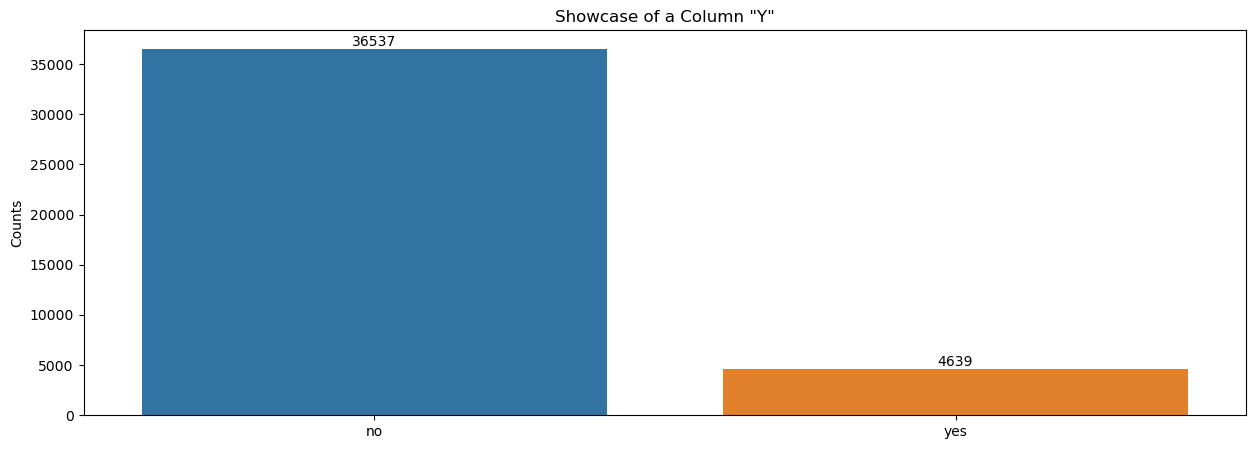

categories,no,yes
perc_count,88.73%,11.27%


In [52]:
box_plotting(dataset=drop_df,
             column='y')

Description: It is noted that 88 percent of respondents contacted by the bank's marketing team decided not to take the bank's deposit service. Meanwhile, only 11 percent of those contacted were interested and willing to use the deposit service offered by the bank.

# E. Data Cleaning

## E1. Rename Categorical Values in Column

In [53]:
new_df = drop_df.copy()

# Map job category
jobCol_categories = new_df['job'].unique().tolist()
newJobCol_cats = []
for each in jobCol_categories:
    newEach = each.capitalize()
    newEach = newEach.replace('.','')
    newJobCol_cats.append(newEach)
jobColReplace_Dict = dict(zip(jobCol_categories, newJobCol_cats))
new_df['job'] = new_df['job'].replace(jobColReplace_Dict)

# Map marital category
maritalCol_categories = new_df['marital'].unique().tolist()
newmaritalCol_cats = []
for each in maritalCol_categories:
    newEach = each.capitalize()
    newmaritalCol_cats.append(newEach)
maritalColReplace_Dict= dict(zip(maritalCol_categories, newmaritalCol_cats))
new_df['marital'] = new_df['marital'].replace(maritalColReplace_Dict)

# Map education category
educationCol_categories = new_df['education'].unique().tolist()
neweducationCol_cats = []
for each in educationCol_categories:
    newEach = each.replace('.', ' ')
    newEach = newEach.replace('4y', '(4 years)') if '4y' in newEach else newEach
    newEach = newEach.replace('6y', '(6 years)') if '6y' in newEach else newEach
    newEach = newEach.replace('9y', '(9 years)') if '9y' in newEach else newEach
    newEach = newEach.title()
    neweducationCol_cats.append(newEach)
educationColReplace_Dict= dict(zip(educationCol_categories, neweducationCol_cats))
new_df['education'] = new_df['education'].replace(educationColReplace_Dict)

# Map default category
defaultCol_categories = new_df['default'].unique().tolist()
newdefaultCol_cats = []
for each in defaultCol_categories:
    newEach = each.capitalize()
    newdefaultCol_cats.append(newEach)    
defaultColReplace_Dict= dict(zip(defaultCol_categories, newdefaultCol_cats))
new_df['default'] = new_df['default'].replace(defaultColReplace_Dict)

# Map housing category
housingCol_categories = new_df['housing'].unique().tolist()
newhousingCol_cats = []
for each in housingCol_categories:
    newEach = each.capitalize()
    newhousingCol_cats.append(newEach)    
housingColReplace_Dict= dict(zip(housingCol_categories, newhousingCol_cats))
new_df['housing'] = new_df['housing'].replace(housingColReplace_Dict)

# Map loan category
loanCol_categories = new_df['loan'].unique().tolist()
newloanCol_cats = []
for each in loanCol_categories:
    newEach = each.capitalize()
    newloanCol_cats.append(newEach)    
loanColReplace_Dict= dict(zip(loanCol_categories, newloanCol_cats))
new_df['loan'] = new_df['loan'].replace(housingColReplace_Dict)

# Map contact category
contactCol_categories = new_df['contact'].unique().tolist()
newcontactCol_cats = []
for each in contactCol_categories:
    newEach = each.capitalize()
    newcontactCol_cats.append(newEach)
contactColReplace_Dict= dict(zip(contactCol_categories, newcontactCol_cats))
new_df['contact'] = new_df['contact'].replace(contactColReplace_Dict)

# Map month category
monthCol_categories = ['mar','apr','may','jun','jul','aug','sep','oct','nov','dec']
newmonthCol_cats = [3,4,5,6,7,8,9,10,11,12]
monthColReplace_Dict= dict(zip(monthCol_categories, newmonthCol_cats))
new_df['month'] = new_df['month'].replace(monthColReplace_Dict)

# Map day_of_week category
day_of_weekCol_categories = ['mon', 'tue', 'wed', 'thu', 'fri']
newday_of_weekCol_cats = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday']
day_of_weekColReplace_Dict= dict(zip(day_of_weekCol_categories, newday_of_weekCol_cats))
new_df['day_of_week'] = new_df['day_of_week'].replace(day_of_weekColReplace_Dict)

# Map poutcome category
poutcomeCol_categories = new_df['poutcome'].unique().tolist()
newpoutcomeCol_cats = []
for each in poutcomeCol_categories:
    newEach = each.replace('non', 'non-') if 'non' in each else each
    newEach = newEach.capitalize()
    newpoutcomeCol_cats.append(newEach)
poutcomeColReplace_Dict= dict(zip(poutcomeCol_categories, newpoutcomeCol_cats))
new_df['poutcome'] = new_df['poutcome'].replace(poutcomeColReplace_Dict)

# Map y category
yCol_categories = new_df['y'].unique().tolist()
newyCol_cats = []
for each in yCol_categories:
    newEach = each.capitalize()
    newyCol_cats.append(newEach)
yColReplace_Dict= dict(zip(yCol_categories, newyCol_cats))
new_df['y'] = new_df['y'].replace(yColReplace_Dict)

In [54]:
new_df.sample(8)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
4929,31,Admin,Married,High School,No,No,No,Telephone,5,Wednesday,230,2,999,0,Non-existent,1.1,93.994,-36.4,4.858,5191.0,No
18571,29,Technician,Single,Professional Course,No,Yes,No,Cellular,7,Thursday,150,2,999,0,Non-existent,1.4,93.918,-42.7,4.968,5228.1,No
2517,31,Management,Married,University Degree,No,No,No,Telephone,5,Tuesday,190,1,999,0,Non-existent,1.1,93.994,-36.4,4.856,5191.0,No
2439,32,Admin,Divorced,High School,No,No,No,Telephone,5,Tuesday,473,1,999,0,Non-existent,1.1,93.994,-36.4,4.856,5191.0,No
2654,35,Blue-collar,Married,Unknown,No,No,No,Telephone,5,Wednesday,128,2,999,0,Non-existent,1.1,93.994,-36.4,4.859,5191.0,No
4005,32,Blue-collar,Married,Basic (6 Years),Unknown,Yes,No,Telephone,5,Monday,36,1,999,0,Non-existent,1.1,93.994,-36.4,4.858,5191.0,No
39886,41,Entrepreneur,Married,University Degree,No,Yes,No,Telephone,6,Friday,23,1,999,0,Non-existent,-1.7,94.055,-39.8,0.732,4991.6,No
16563,26,Admin,Single,University Degree,No,No,Yes,Cellular,7,Wednesday,979,3,999,0,Non-existent,1.4,93.918,-42.7,4.963,5228.1,No


## E2. Final Checking on the Category Lists

In [55]:
def cardinal_check(dataset):
    listcol = dataset.select_dtypes(include='object').columns.tolist()
    listcount = []
    listunique = []
    for idx in range(len(listcol)):
        col = listcol[idx]
        unique = dataset[col].unique().tolist()
        listcount.append(len(unique))
        listunique.append(unique)
    
    data = {'column':listcol,
            'n_unique':listcount,
            'categories':listunique}
    display(pd.DataFrame(data=data))
    
cardinal_check(new_df)

,column,n_unique,categories
0,job,12,"[Housemaid, Services, Admin, Blue-collar, Technician, Retired, Management, Unemployed, Self-employed, Unknown, Entrepreneur, Student]"
1,marital,4,"[Married, Single, Divorced, Unknown]"
2,education,8,"[Basic (4 Years), High School, Basic (6 Years), Basic (9 Years), Professional Course, Unknown, University Degree, Illiterate]"
3,default,3,"[No, Unknown, Yes]"
4,housing,3,"[No, Yes, Unknown]"
5,loan,3,"[No, Yes, Unknown]"
6,contact,2,"[Telephone, Cellular]"
7,day_of_week,5,"[Monday, Tuesday, Wednesday, Thursday, Friday]"
8,poutcome,3,"[Non-existent, Failure, Success]"
9,y,2,"[No, Yes]"


## E3. Rename Column

In [56]:
cols_list = new_df.columns.tolist()
colReplacementList = ['age','occupation','marital_status','education_level','credit_default','housing_loan','personal_loan','contact_method','last_contact_month','last_contact_day_of_week','last_contact_duration','campaign_contacts','days_since_previous_contact','previous_contacts','previous_campaign_outcome','employment_variation_rate','consumer_price_index','consumer_confidence_index','euribor_3_month_rate','number_employed','subscription_status']

zip_dict = dict(zip(cols_list, colReplacementList))

clean_df = new_df.copy()
clean_df = clean_df.rename(columns=zip_dict)
clean_df.sample(8)

,age,occupation,marital_status,education_level,credit_default,housing_loan,personal_loan,contact_method,last_contact_month,last_contact_day_of_week,last_contact_duration,campaign_contacts,days_since_previous_contact,previous_contacts,previous_campaign_outcome,employment_variation_rate,consumer_price_index,consumer_confidence_index,euribor_3_month_rate,number_employed,subscription_status
32538,32,Blue-collar,Single,Basic (6 Years),No,Yes,No,Cellular,5,Friday,211,1,999,1,Failure,-1.8,92.893,-46.2,1.313,5099.1,No
16182,57,Management,Married,University Degree,No,No,No,Cellular,7,Tuesday,632,1,999,0,Non-existent,1.4,93.918,-42.7,4.961,5228.1,No
31168,26,Blue-collar,Married,Basic (9 Years),No,Yes,No,Cellular,5,Wednesday,209,1,999,0,Non-existent,-1.8,92.893,-46.2,1.334,5099.1,No
4529,52,Blue-collar,Married,Basic (9 Years),No,Yes,Yes,Telephone,5,Tuesday,29,16,999,0,Non-existent,1.1,93.994,-36.4,4.856,5191.0,No
6414,40,Services,Single,High School,Unknown,No,No,Telephone,5,Wednesday,189,7,999,0,Non-existent,1.1,93.994,-36.4,4.857,5191.0,No
1270,35,Unknown,Married,Basic (9 Years),No,No,No,Telephone,5,Thursday,108,2,999,0,Non-existent,1.1,93.994,-36.4,4.855,5191.0,No
12616,25,Blue-collar,Single,High School,No,No,No,Cellular,7,Monday,234,1,999,0,Non-existent,1.4,93.918,-42.7,4.960,5228.1,No
29052,26,Admin,Single,University Degree,No,No,No,Telephone,4,Friday,52,6,999,0,Non-existent,-1.8,93.075,-47.1,1.405,5099.1,No


# F. Final Exploratory Data Analysis

In [63]:
final_df = pd.read_csv('bank-additional-full_cleaned.csv')

In [68]:
final_df.head()

,age,occupation,marital_status,education_level,credit_default,housing_loan,personal_loan,contact_method,last_contact_month,last_contact_day_of_week,last_contact_duration,campaign_contacts,days_since_previous_contact,previous_contacts,previous_campaign_outcome,employment_variation_rate,consumer_price_index,consumer_confidence_index,euribor_3_month_rate,number_employed,subscription_status
0,56,Housemaid,Married,Basic (4 Years),No,No,No,Telephone,5,Monday,261,1,999,0,Non-existent,1.1,93.994,-36.4,4.857,5191.0,No
1,37,Services,Married,High School,No,Yes,No,Telephone,5,Monday,226,1,999,0,Non-existent,1.1,93.994,-36.4,4.857,5191.0,No
2,40,Admin,Married,Basic (6 Years),No,No,No,Telephone,5,Monday,151,1,999,0,Non-existent,1.1,93.994,-36.4,4.857,5191.0,No
3,56,Services,Married,High School,No,No,Yes,Telephone,5,Monday,307,1,999,0,Non-existent,1.1,93.994,-36.4,4.857,5191.0,No
4,59,Admin,Married,Professional Course,No,No,No,Telephone,5,Monday,139,1,999,0,Non-existent,1.1,93.994,-36.4,4.857,5191.0,No


**Important**: The final version of the visualization can be accessed freely through this [link](https://public.tableau.com/app/profile/nicku.rendy.perdana2598/viz/BankMarketingAnalysis_17096191008530/Main_Dashboard?publish=yes).

## F1. Monthly Bank Marketing Contacts Performance

![Figure](figures\figure_1_last_contact_month.png)

Description:  
- The graph above illustrates that the majority of respondents were most frequently contacted by the marketing team in the month of May.
- There is a noticeable trend among those who opt not to utilize the deposit service. Within this group, nearly 3 out of 4 individuals contacted and subsequently declined the service were reached in May.
- Considering the campaign's initiation in March, and accounting for the lack of telemarketing log records in January and February.
- Throughout the telemarketing contacts conducted by the referenced bank, it is observed that the promotional campaign for the bank's term deposit service commenced in Q3 of that year. This is indicated by the absence of call log history with customers in January and February.
- The campaign's focus reached its peak in May of the campaign year, characterized by nearly 10,000 calls made during that month.
- There is fluctuation in the number of calls made by telemarketers between June and August, with the total calls ranging from 3,500 to 5,000. Given that the dataset does not contain duplicate values, this suggests a decrease not due to follow-up activities resulting from a high volume of calls in the preceding month.

## F2. Subscription Status

![Figure 2](figures\figure_2_subscription_status.png)

Description:
- Out of approximately 30,000 clean data points to be processed for modeling, it is observed that 87% of contacted customers prefer not to subscribe to the term deposit service offered by the bank's telemarketers.
- Only about 13%, or roughly over 3,000 customers, contacted are willing to opt for the term deposit subscription service offered by the bank through telemarketing.
- These findings highlight a data tendency towards imbalance: the classification of records/customers is uneven, with a ratio of 87.34:12.66 between class 0 and class 1, respectively, in percentage terms.
- Considering these variables will be the target of modeling, our team will focus on data balancing to provide a more representative modeling approach capable of capturing patterns to predict customers' final decisions after being contacted by telemarketing regarding the offer of the bank's term deposit subscription service.

## F3. Respondents' Age Information

![Figure 3](figures\figure_3_age.png)

In [89]:
# two-sample independent test: age
subscribed_age = final_df[final_df['subscription_status'] == 'Yes']['age']
no_subscribed_age = final_df[final_df['subscription_status'] == 'No']['age']

print('Average Last Contact Duration (Subscribed) =',subscribed_age.mean())
print('Average Last Contact Duration (Not Subscribed) =',no_subscribed_age.mean())
print('\nHypothesis:')
print('H0: Subscribed == Not Subscribed')
print('H1: Subscribed != Not Subscribed')
print('\nTwo-Pair Independent Testing on Last Contact Duration\nbetween Subscribed and Not-subscribed Group:')
t_stat, p_val = stats.ttest_ind(subscribed_age,no_subscribed_age)
print('T-Statistic:',t_stat)
print('P-value:',p_val)

Average Last Contact Duration (Subscribed) = 40.35147744945568
Average Last Contact Duration (Not Subscribed) = 38.83812922614575

Hypothesis:
H0: Subscribed == Not Subscribed
H1: Subscribed != Not Subscribed

Two-Pair Independent Testing on Last Contact Duration
between Subscribed and Not-subscribed Group:
T-Statistic: 8.511841609770288
P-value: 1.789237228058244e-17


Description:  
- The age distribution displays a positive skew, noticeable as the chart leans towards the left side, with twelve percent of records identified as outliers.
- Those opting for banking deposit services tend to be older compared to those who decline the offer.
- This finding is supported by the two-paired independent test, which concludes a significant difference in age characteristics between customers opting for term deposit subscription services and those rejecting the bank's promotional offers.

## F4. Respondents' Occupation Information

![Figure 4](figures\figure_4_occupation.png)

In [94]:
# chi-square: occupation
print('Hypothesis:')
print('H0: There is no correlation between occupation and subscription status')
print('H1: There is a significant correlation between occupation and subscription status')
print('\nChi-square Test on Relationship\nbetween Occupation and and Subscription Status:')
res_chi = stats.chi2_contingency(pd.crosstab(final_df['occupation'], final_df['subscription_status']))
print("P-value:",res_chi.pvalue)

Hypothesis:
H0: There is no correlation between occupation and subscription status
H1: There is a significant correlation between occupation and subscription status

Chi-square Test on Relationship
between Occupation and and Subscription Status:
P-value: 1.8290452273362543e-150


Description:
- The most commonly cited occupations among respondents are in administration and private employment. This trend persists among respondents who ultimately opt to deposit and those who do not. Both groups also share technicians as the third most frequently mentioned occupation.
- Out of all customers contacted by telemarketing, only about 2 percent, or approximately 610 individuals, are students.
- The p-value indicating the relationship between occupation and subscription status is known, marked by a p-value score smaller than the critical value set (p-value < 0.05).
- Therefore, the occupation variable has a significant association with the final decision status of customers regarding subscribing to term deposit services.

## F5. Contact Duration per Respondent (in Seconds)

![Figure 5](figures\figure_5_last_contact_duration.png)

In [87]:
# two-sample independent test: last_contact_duration
subscribed_last_contact_duration = final_df[final_df['subscription_status'] == 'Yes']['last_contact_duration']
no_subscribed_last_contact_duration = final_df[final_df['subscription_status'] == 'No']['last_contact_duration']

print('Average Last Contact Duration (Subscribed) =',subscribed_last_contact_duration.mean())
print('Average Last Contact Duration (Not Subscribed) =',no_subscribed_last_contact_duration.mean())
print('\nHypothesis:')
print('H0: Subscribed == Not Subscribed')
print('H1: Subscribed != Not Subscribed')
print('\nTwo-Pair Independent Testing on Last Contact Duration\nbetween Subscribed and Not-subscribed Group:')
t_stat, p_val = stats.ttest_ind(subscribed_last_contact_duration,no_subscribed_last_contact_duration)
print('T-Statistic:',t_stat)
print('P-value:',p_val)

Average Last Contact Duration (Subscribed) = 530.1005702436496
Average Last Contact Duration (Not Subscribed) = 220.2972577009767

H0: Subscribed == Not Subscribed
H1: Subscribed != Not Subscribed

Two-Pair Independent Testing on Last Contact Duration
between Subscribed and Not-subscribed Group:
T-Statistic: 74.73661281011796
P-value: 0.0


Description:
- The distribution of contact duration shows a positive skew, with over 15% of all records identified as outliers.
- Typically, customers who ultimately choose not to subscribe to the bank's term deposit service tend to have shorter contact durations compared to those who do subscribe.
- This tendency suggests that individuals already disinterested in banking offers are less likely to engage further in telemarketer conversations.
- Conversely, customers inclined to subscribe exhibit longer contact durations, indicating more substantial, prolonged, and active engagement with telemarketers.
- Ultimately, respondents with shorter durations tend to decline banking offers, whereas those engaged in longer durations tend to become subscribers.
- Two-pair independent testing results indicate significant differences in call duration between the subscribing and non-subscribing groups.

## F6. Marriage Status Information

![Figure 6](figures\figure_6_marital_status.png)

In [93]:
# chi-square: marital_status
print('Hypothesis:')
print('H0: There is no correlation between marital status and subscription status')
print('H1: There is a significant correlation between marital status and subscription status')
print('\nChi-square Test on Relationship\nbetween marital status and and Subscription Status:')
res_chi = stats.chi2_contingency(pd.crosstab(final_df['marital_status'], final_df['subscription_status']))
print("P-value:",res_chi.pvalue)

Hypothesis:
H0: There is no correlation between marital status and subscription status
H1: There is a significant correlation between marital status and subscription status

Chi-square Test on Relationship
between marital status and and Subscription Status:
P-value: 1.3663455289953922e-12


Description:
- It is known that the majority of respondents are married, comprising 57 percent of the total.
- About one-third of all respondents contacted by the bank's marketing team are still single.
- The remainder, approximately 12 percent, are respondents currently going through divorce. It's noteworthy that this status accounts for both legally separated (divorce while both parties are alive) and widowed (the death of their partner).
- Based on the identification of marital status characteristics among those who opt to deposit and those who don't, there is a relationship between marital status and the decision to subscribe to the term deposit service.

## F7. Number of Contacts per Respondent

![Figure 7](figures\figure_7_campaign_contacts.png)

In [88]:
# two-paired independent test: campaign_contacts
subscribed_campaign_contacts = final_df[final_df['subscription_status'] == 'Yes']['campaign_contacts']
no_subscribed_campaign_contacts = final_df[final_df['subscription_status'] == 'No']['campaign_contacts']

print('Average Campaign Contacts Conducted (Subscribed) =',subscribed_campaign_contacts.mean())
print('Average Campaign Contacts Conducted (Not Subscribed) =',no_subscribed_campaign_contacts.mean())
print('\nHypothesis:')
print('H0: Subscribed == Not Subscribed')
print('H1: Subscribed != Not Subscribed')
print('\nTwo-Pair Independent Testing on Campaign Contacts\nbetween Subscribed and Not-subscribed Group:')
t_stat, p_val = stats.ttest_ind(subscribed_campaign_contacts,no_subscribed_campaign_contacts)
print('T-Statistic:',t_stat)
print('P-value:',p_val)

Average Campaign Contacts Conducted (Subscribed) = 2.027216174183515
Average Campaign Contacts Conducted (Not Subscribed) = 2.593388429752066

Hypothesis:
H0: Subscribed == Not Subscribed
H1: Subscribed != Not Subscribed

Two-Pair Independent Testing on Campaign Contacts
between Subscribed and Not-subscribed Group:
T-Statistic: -12.109543251868946
P-value: 1.1235838029747563e-33


Description:  
- The majority of respondents had fewer than 10 interactions with banking campaigns and telemarketers.
- Those opting to subscribe to banking offers tended to have fewer campaign interactions, possibly due to their inherent interest and quicker decision-making.
- Conversely, most respondents disinterested in banking offers had more interaction contacts, possibly due to delayed decisions and extended follow-ups.
- The significant difference in contact numbers between subscribers and non-subscribers may indicate delayed decisions and over-contact by telemarketers.
- The two-paired independent test results also indicate significant differences between subscribers and non-subscribers.

## F8. Respondents' Education Background

![Figure 8](figures\figure_8_education_level.png)

In [96]:
# chi-square: marital_status
print('Hypothesis:')
print('H0: There is no correlation between education level and subscription status')
print('H1: There is a significant correlation between education level and subscription status')
print('\nChi-square Test on Relationship\nbetween education level and and Subscription Status:')
res_chi = stats.chi2_contingency(pd.crosstab(final_df['education_level'], final_df['subscription_status']))
print("P-value:",res_chi.pvalue)

Hypothesis:
H0: There is no correlation between education level and subscription status
H1: There is a significant correlation between education level and subscription status

Chi-square Test on Relationship
between education level and and Subscription Status:
P-value: 1.6457318166269286e-22


Description:
- There are only 8 individuals, or 0.02 percent of the data, categorized as 'Illiterate'.
- Those who eventually deposit assets into the bank after the campaign tend to belong to the university-educated demographic category.
- Conversely, individuals who opt not to deposit come from a more diverse demographic category, with a higher proportion having basic and secondary education backgrounds.
- This suggests that education level significantly influences their decision to deposit or decline this opportunity.
- Based on statistical analysis, it's noted that the education status variable has a fairly significant association with the final decision of contacted customers in choosing the term deposit service subscription offered by the bank.

## F9. Personal Loan Information

![Figure 9](figures\figure_9_personal_loan.png)

In [97]:
# chi-square: marital_status
print('Hypothesis:')
print('H0: There is no correlation between personal loan and subscription status')
print('H1: There is a significant correlation between personal loan and subscription status')
print('\nChi-square Test on Relationship\nbetween personal loan and and Subscription Status:')
res_chi = stats.chi2_contingency(pd.crosstab(final_df['personal_loan'], final_df['subscription_status']))
print("P-value:",res_chi.pvalue)

Hypothesis:
H0: There is no correlation between personal loan and subscription status
H1: There is a significant correlation between personal loan and subscription status

Chi-square Test on Relationship
between personal loan and and Subscription Status:
P-value: 0.3920663794938557


Description:
- Among all bank customers who were respondents to the term deposit service promotion, it's observed that 16 percent of them currently have personal loans in their respective accounts.
- Approximately four out of five respondents do not have any loans in their accounts.
- Demographically, the majority of respondents across both groups—those who subscribe to the term deposit service and those who reject it—do not have existing loans in their accounts.
- This assumption is further supported by a chi-square test, which concludes that the variables of personal loan status and subscription status are not significantly related, as evidenced by a p-value score greater than the critical p-value: 0.3920663794938557 > 0.05.

## F10. Housing Loan Information

![Figure 10](figures\figure_10_housing_loan.png)

In [98]:
# chi-square: marital_status
print('Hypothesis:')
print('H0: There is no correlation between housing loan and subscription status')
print('H1: There is a significant correlation between housing loan and subscription status')
print('\nChi-square Test on Relationship\nbetween housing loan and and Subscription Status:')
res_chi = stats.chi2_contingency(pd.crosstab(final_df['housing_loan'], final_df['subscription_status']))
print("P-value:",res_chi.pvalue)

Hypothesis:
H0: There is no correlation between housing loan and subscription status
H1: There is a significant correlation between housing loan and subscription status

Chi-square Test on Relationship
between housing loan and and Subscription Status:
P-value: 0.07869987539433847


Description:
- A significant portion of respondents have housing loans, with data indicating that more than half of those who either opt for or decline the bank's term deposit services are involved in mortgage programs.
- Through statistical testing using the chi-square metric, it's found that the housing loan variable has a relatively weak correlation with the final subscription status variable of customers contacted by the bank's telemarketing team.
- These findings suggest that this variable may not warrant further attention, as housing loan status does not exhibit significant correlation with the target outcome. Additionally, real-life circumstances influencing housing loan possession may not necessarily align with personal interest in accepting or rejecting term deposit subscription offers.

 
## F11. Contact Medium

![Figure 11](figures\figure_11_contact_method.png)

In [100]:
# chi-square: marital_status
print('Hypothesis:')
print('H0: There is no correlation between contact method and subscription status')
print('H1: There is a significant correlation between contact method and subscription status')
print('\nChi-square Test on Relationship\nbetween contact method and and Subscription Status:')
res_chi = stats.chi2_contingency(pd.crosstab(final_df['contact_method'], final_df['subscription_status']))
print("P-value:",res_chi.pvalue)

Hypothesis:
H0: There is no correlation between contact method and subscription status
H1: There is a significant correlation between contact method and subscription status

Chi-square Test on Relationship
between contact method and and Subscription Status:
P-value: 5.354605622000064e-139


Description:
- The predominant communication channel for both subscribers and non-subscribers of the bank's deposit service is mobile phones.
- An intriguing trend emerges where non-subscribers show a higher proportion of responses via landline phones, suggesting a potential reluctance to engage further through this medium.
- This is further evidenced by correlation analysis using the chi-square metric; it reveals a significant relationship between the contact medium utilized by telemarketing and the likelihood of customers opting for the term deposit promotion. The resulting p-value score of 5.354605622000064e-139 is below the established threshold of 0.05.

# G. Conclusion  

- The telemarketing campaign, predominantly active in May, witnessed a significant number of respondents being contacted, with a noticeable trend of refusal among those reached during this period.

- The initiation of the campaign in Q3, marked by increased contact in May, and fluctuations in subsequent months highlight strategic shifts in marketing efforts over time.

- Data imbalance, with a vast majority preferring not to subscribe, necessitates a focused approach to modeling for predictive accuracy.

- Age, occupation, marital status, and education level exhibit significant correlations with subscription decisions, offering valuable insights into customer behavior.

- Contact duration patterns reveal distinct engagement levels, with longer durations often indicating a higher propensity to subscribe.

- The prevalence of mobile phones as the primary communication channel underscores its importance in marketing effectiveness, while the propensity of non-subscribers to prefer landline contact warrants further investigation.

- Loan status, particularly personal loans and housing loans, while not strongly correlated with subscription decisions, provides nuanced insights into customer demographics.

- Statistical tests affirm the significance of various demographic factors and contact mediums in influencing subscription decisions, guiding future marketing strategies.

- Overall, these insights underscore the importance of data-driven decision-making and targeted marketing strategies in optimizing subscription conversion rates for the term deposit service.